In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns





# initial

In [2]:


input_csv = pd.read_csv(r"G:\fresh_start\paper\code_paper\main_data\final_data\decadal_trend_data.csv")

# Strip any extra spaces
input_csv['naming'] = input_csv['naming'].str.strip()

# Split the string by spaces, and assign accordingly
input_csv['Temperature_Type'] = input_csv['naming'].str.split().str[0]  # First word
input_csv['Season'] = input_csv['naming'].str.split().str[-1]  # Last word
input_csv['Region'] = input_csv['naming'].str.split().str[1:-1].apply(' '.join)  # Middle part (Region)

# Verify the result
input_csv.columns



Index(['naming', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '1962 to 1971', '1972 to 1981', '1982 to 1991', ' 1992 to 2001',
       '2002 to 2011', '2012 to 2021', '1977 to 1994', ' 1980 to 2018',
       '1988 to 2010', ' 1976 to 2005', '1981-2010', '1977-2000',
       '1962 - 2022', 'Total count', 'Temperature_Type', 'Season', 'Region'],
      dtype='object')

In [3]:

# Selecting the required columns
selected_columns = [
    'Temperature_Type', 'Region', 'Season', 
    '1962 to 1971', '1972 to 1981', '1982 to 1991', ' 1992 to 2001',
    '2002 to 2011', '2012 to 2021', '1962 - 2022'
]

# Creating a new DataFrame with the selected columns
df_selected = input_csv[selected_columns]

# Display the final DataFrame
print(df_selected)
df_selected.to_csv("trends_csvs.csv", index=False)

   Temperature_Type         Region       Season  1962 to 1971  1972 to 1981  \
0              Tavg  High Mountain      Monsoon      0.025195     -0.043017   
1              Tavg  High Mountain  Postmonsoon     -0.057980     -0.082583   
2              Tavg  High Mountain   Premonsoon      0.019327     -0.026063   
3              Tavg  High Mountain       Winter     -0.014643     -0.028205   
4              Tavg  High Mountain       annual     -0.007025     -0.044967   
..              ...            ...          ...           ...           ...   
85             Tmin          Tarai      Monsoon     -0.021290     -0.009577   
86             Tmin          Tarai  Postmonsoon     -0.123951     -0.085332   
87             Tmin          Tarai   Premonsoon     -0.017326     -0.005208   
88             Tmin          Tarai       Winter     -0.140717     -0.020097   
89             Tmin          Tarai       annual     -0.075821     -0.030053   

    1982 to 1991   1992 to 2001  2002 to 2011  2012

In [4]:
# Melting the DataFrame to combine the decades into a single column
df_long = df_selected.melt(
    id_vars=['Temperature_Type', 'Region', 'Season'],  # These remain as identifiers
    var_name='Decade',  # The name of the new column for decades
    value_name='Trend'  # The name of the column for the values
)

# Display the final DataFrame
print(df_long)

    Temperature_Type         Region       Season        Decade     Trend
0               Tavg  High Mountain      Monsoon  1962 to 1971  0.025195
1               Tavg  High Mountain  Postmonsoon  1962 to 1971 -0.057980
2               Tavg  High Mountain   Premonsoon  1962 to 1971  0.019327
3               Tavg  High Mountain       Winter  1962 to 1971 -0.014643
4               Tavg  High Mountain       annual  1962 to 1971 -0.007025
..               ...            ...          ...           ...       ...
625             Tmin          Tarai      Monsoon   1962 - 2022 -0.021516
626             Tmin          Tarai  Postmonsoon   1962 - 2022 -0.004451
627             Tmin          Tarai   Premonsoon   1962 - 2022  0.001132
628             Tmin          Tarai       Winter   1962 - 2022 -0.029108
629             Tmin          Tarai       annual   1962 - 2022 -0.013486

[630 rows x 5 columns]


In [5]:
# Define a dictionary to map full region names to their abbreviations
region_abbreviations = {
    'High Mountain': 'H',
    'Hill': 'MM',
    'Koshi Basin': 'KB',
    'Middle Mountain': 'HM',
    'Siwalik': 'SW',
    'Tarai': 'TAR'
}

# Replace the full region names with abbreviations
df_long['Region'] = df_long['Region'].replace(region_abbreviations)

# Print the updated 'Region' column to verify the changes
print(df_long['Region'].unique())

['H' 'MM' 'KB' 'HM' 'SW' 'TAR']


In [6]:
print(df_long['Trend'].max())
print(df_long['Trend'].min())

0.790285629
-0.522325911


# plot 1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure your data is sorted or ordered properly
df_sorted = df_long.sort_values(by=['Temperature_Type', 'Season', 'Decade'])

# Set style for Elsevier-like publication standards
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Loop over unique Temperature_Types and Seasons to generate separate figures
for temp_type in df_sorted['Temperature_Type'].unique():
    # Create a figure for each temperature type
    fig, axs = plt.subplots(3, 2, figsize=(15, 10), sharey=True)
    fig.suptitle(f'Trend over Decades for {temp_type}', fontsize=16)

    # Get unique seasons
    seasons = df_sorted['Season'].unique()
    
    for i, season in enumerate(seasons):
        # Get data for the specific temperature type and season
        df_season = df_sorted[(df_sorted['Temperature_Type'] == temp_type) & 
                              (df_sorted['Season'] == season)]
        
        # Determine subplot location
        ax = axs[i // 2, i % 2]

        # Create histogram plot
        sns.barplot(
            x='Decade', y='Trend', hue='Region', 
            data=df_season, ax=ax, dodge=True
        )

        # Set axis labels and title
        ax.set_title(season, fontsize=14)
        ax.set_xlabel('Decade', fontsize=12)
        ax.set_ylabel('Trend', fontsize=12)

        # Rotate x-axis labels for better readability
        ax.tick_params(axis='x', rotation=45)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Save each figure (you can change the file name)
    plt.savefig(f'{temp_type}_Trend_Decades.png', dpi=300)

    # Show the plot
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set publication style aesthetics (Elsevier-like)
sns.set(style="whitegrid", palette="muted", rc={"figure.figsize": (10, 6)})
plt.rcParams.update({'font.size': 12})  # Increase font size for readability

# Unique combinations of temperature types and seasons
unique_combinations = df_long[['Temperature_Type', 'Season']].drop_duplicates()

# Loop through each combination and create a plot
for _, row in unique_combinations.iterrows():
    temp_type = row['Temperature_Type']
    season = row['Season']
    
    # Filter the data for the current Temperature_Type and Season
    df_filtered = df_long[(df_long['Temperature_Type'] == temp_type) & (df_long['Season'] == season)]
    
    # Plot setup
    plt.figure()
    
    # Create the histogram with 'Region' on X-axis and 'Trend' on Y-axis, colored by 'Decade'
    sns.barplot(
        data=df_filtered, 
        x='Region', y='Trend', hue='Decade', 
        ci=None, palette='coolwarm', dodge=True
    )
    
    # Add titles and labels
    plt.title(f'Trend of {temp_type} in {season}', fontsize=14)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Trend (°C/decade)', fontsize=12)
    
    # Adjust legend for decades
    plt.legend(title='Decade', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Improve layout for publication
    plt.tight_layout()
    
    # Save figure (you can adjust the file format as needed for Elsevier)
    plt.savefig(f'{temp_type}_{season}_trend_histogram.png', dpi=300)

    # Display the plot
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for publication
sns.set(style="whitegrid")

# Get unique decades and seasons
unique_decades = df_long['Decade'].unique()
unique_seasons = df_long['Season'].unique()

# Create plots
for decade in unique_decades:
    for season in unique_seasons:
        # Filter data for each decade and season
        df_filtered = df_long[(df_long['Decade'] == decade) & (df_long['Season'] == season)]
        
        # Initialize the figure
        plt.figure(figsize=(10, 6))
        
        # Create the bar plot (histogram)
        sns.barplot(data=df_filtered, x='Region', y='Trend', hue='Temperature_Type', palette='coolwarm')
        
        # Set plot title and labels
        plt.title(f'Trend Analysis: {decade} - {season}', fontsize=14)
        plt.xlabel('Region', fontsize=12)
        plt.ylabel('Trend', fontsize=12)
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)
        
        # Add a legend and adjust layout
        plt.legend(title='Temperature_Type', loc='upper right')
        plt.tight_layout()
        
        # Save the figure
        plt.savefig(f'Trend_{decade}_{season}.png', dpi=300)  # High-quality output for publication
        
        # Show the plot
        plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for publication
sns.set(style="whitegrid")

# Calculate global min and max for y-axis limits using modulus
global_min = -0.7
global_max = 0.7

# Get unique decades and seasons
unique_decades = df_long['Decade'].unique()
unique_seasons = df_long['Season'].unique()

# Create plots
for decade in unique_decades:
    for season in unique_seasons:
        # Filter data for each decade and season
        df_filtered = df_long[(df_long['Decade'] == decade) & (df_long['Season'] == season)]
        
        # Initialize the figure
        plt.figure(figsize=(10, 6))
        
        # Create the bar plot (histogram)
        sns.barplot(data=df_filtered, x='Region', y='Trend', hue='Temperature_Type', palette='coolwarm')
        
        # Set y-axis limits
        plt.ylim(global_min, global_max)
        
        # Set plot title and labels
        plt.title(f'Trend Analysis: {decade} - {season}', fontsize=14)
        plt.xlabel('Region', fontsize=12)
        plt.ylabel('Trend', fontsize=12)
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)
        
        # Add a legend and adjust layout
        plt.legend(title='Temperature_Type', loc='upper right')
        plt.tight_layout()
        
        # Save the figure
        plt.savefig(f'Trend_{decade}_{season}.png', dpi=300)  # High-quality output for publication
        
        # Show the plot
        plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style for publication
sns.set(style="whitegrid")

# Calculate global min and max for y-axis limits using modulus
global_min = -0.7
global_max = 0.7

# Get unique decades and seasons
unique_decades = df_long['Decade'].unique()
unique_seasons = df_long['Season'].unique()

# Create plots
for decade in unique_decades:
    num_seasons = len(unique_seasons)
    # Determine number of rows and columns for subplots
    ncols = 2
    nrows = int(np.ceil(num_seasons / ncols))  # Calculate rows needed based on number of seasons
    
    # Set up the subplot grid
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    
    for i, season in enumerate(unique_seasons):
        # Filter data for each decade and season
        df_filtered = df_long[(df_long['Decade'] == decade) & (df_long['Season'] == season)]
        
        # Create the bar plot (histogram) in the corresponding subplot
        sns.barplot(data=df_filtered, x='Region', y='Trend', hue='Temperature_Type', palette='coolwarm', ax=axes[i])
        
        # Set y-axis limits
        axes[i].set_ylim(global_min, global_max)
        
        # Set plot title and labels
        axes[i].set_title(f'{season}', fontsize=12)
        axes[i].set_xlabel('Region', fontsize=10)
        axes[i].set_ylabel('Trend', fontsize=10)
        
        # Rotate x-axis labels for better readability
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide any unused subplots
    for j in range(num_seasons, len(axes)):
        fig.delaxes(axes[j])
        
    # Set the main title for the entire figure
    fig.suptitle(f'Trend Analysis: {decade}', fontsize=16)
    
    # Add a legend to the last subplot
    axes[0].legend(title='Temperature_Type', loc='upper right')
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the main title position
    
    # Save the figure
    plt.savefig(f'Trend_{decade}.png', dpi=300)  # High-quality output for publication
    
    # Show the plot
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style for publication
sns.set(style="whitegrid")

# Calculate global min and max for y-axis limits using modulus
global_min = -0.7
global_max = 0.7

# Get unique seasons and decades
unique_seasons = df_long['Season'].unique()
unique_decades = df_long['Decade'].unique()

# Create plots
for season in unique_seasons:
    num_decades = len(unique_decades)
    # Determine number of rows and columns for subplots
    ncols = 3
    nrows = int(np.ceil(num_decades / ncols))  # Calculate rows needed based on number of decades
    
    # Set up the subplot grid
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    
    for i, decade in enumerate(unique_decades):
        # Filter data for each decade and season
        df_filtered = df_long[(df_long['Decade'] == decade) & (df_long['Season'] == season)]
        
        # Create the bar plot (histogram) in the corresponding subplot
        sns.barplot(data=df_filtered, x='Region', y='Trend', hue='Temperature_Type', palette='coolwarm', ax=axes[i])
        
        # Set y-axis limits
        axes[i].set_ylim(global_min, global_max)
        
        # Set plot title and labels
        axes[i].set_title(f'{decade}', fontsize=12)
        axes[i].set_xlabel('Region', fontsize=10)
        axes[i].set_ylabel('Trend', fontsize=10)
        
        # Rotate x-axis labels for better readability
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide any unused subplots
    for j in range(num_decades, len(axes)):
        fig.delaxes(axes[j])
        
    # Set the main title for the entire figure
    fig.suptitle(f'Trend Analysis: {season}', fontsize=16)
    
    # Add a legend to the last subplot
    axes[0].legend(title='Temperature_Type', loc='upper right')
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the main title position
    
    # Save the figure
    plt.savefig(f'Trend_{season}.png', dpi=300)  # High-quality output for publication
    
    # Show the plot
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style for publication
sns.set(style="whitegrid")

# Calculate global min and max for y-axis limits using modulus
global_min = -0.7
global_max = 0.7

# Get unique seasons and decades
unique_seasons = df_long['Season'].unique()
unique_decades = df_long['Decade'].unique()

# Create plots
for season in unique_seasons:
    num_decades = len(unique_decades)
    # Determine number of rows and columns for subplots
    ncols = 3
    nrows = int(np.ceil(num_decades / ncols))  # Calculate rows needed based on number of decades
    
    # Set up the subplot grid
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    
    for i, decade in enumerate(unique_decades):
        # Filter data for each decade and season
        df_filtered = df_long[(df_long['Decade'] == decade) & (df_long['Season'] == season)]
        
        # Create the bar plot (histogram) in the corresponding subplot
        sns.barplot(data=df_filtered, x='Region', y='Trend', hue='Temperature_Type', palette='coolwarm', ax=axes[i])
        
        # Set y-axis limits
        axes[i].set_ylim(global_min, global_max)
        
        # Set plot title for each subplot
        axes[i].set_title(f'{decade}', fontsize=12)
        
        # Rotate x-axis labels for better readability
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide any unused subplots
    for j in range(num_decades, len(axes)):
        fig.delaxes(axes[j])
        
    # Set the main title for the entire figure
    fig.suptitle(f'Trend Analysis: {season}', fontsize=16)
    
    # Add a single legend for the entire figure
    #handles, labels = axes[0].get_legend_handles_labels()  # Get handles from the first subplot
    #fig.legend(handles, labels, title='Temperature_Type', loc='upper right', bbox_to_anchor=(0.9, 0.9))
    
    # Set common x and y axis labels
    #fig.text(0.5, 0.04, 'Region', ha='center', fontsize=12)
    #fig.text(0.04, 0.5, 'Trend', va='center', rotation='vertical', fontsize=12)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the main title position
    
    # Save the figure
    #plt.savefig(f'Trend_{season}.png', dpi=300)  # High-quality output for publication
    
    # Show the plot
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style for publication
sns.set(style="whitegrid")

# Calculate global min and max for y-axis limits using modulus
global_min = -0.7
global_max = 0.7

# Get unique seasons and decades
unique_seasons = df_long['Season'].unique()
unique_decades = df_long['Decade'].unique()

# Create plots
for season in unique_seasons:
    num_decades = len(unique_decades)
    # Determine number of rows and columns for subplots
    ncols = 3
    nrows = int(np.ceil(num_decades / ncols))  # Calculate rows needed based on number of decades
    
    # Set up the subplot grid
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    
    for i, decade in enumerate(unique_decades):
        # Filter data for each decade and season
        df_filtered = df_long[(df_long['Decade'] == decade) & (df_long['Season'] == season)]
        
        # Create the bar plot (histogram) in the corresponding subplot
        sns.barplot(data=df_filtered, x='Region', y='Trend', hue='Temperature_Type', palette='coolwarm', ax=axes[i])
        
        # Set y-axis limits
        axes[i].set_ylim(global_min, global_max)
        
        # Set plot title for each subplot
        axes[i].set_title(f'{decade}', fontsize=12)
        
        # Rotate x-axis labels for better readability
        axes[i].tick_params(axis='x', rotation=45)

        # Remove individual axis labels
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    
    # Hide any unused subplots
    for j in range(num_decades, len(axes)):
        fig.delaxes(axes[j])
        
    # Set the main title for the entire figure
    fig.suptitle(f'Trend Analysis: {season}', fontsize=16)
    
    # Add a single legend for the entire figure
    handles, labels = axes[0].get_legend_handles_labels()  # Get handles from the first subplot
    fig.legend(handles, labels, title='Temperature_Type', loc='upper right', bbox_to_anchor=(0.9, 0.9))
    
    # Set common x and y axis labels for the figure
    fig.text(0.5, 0.04, 'Region', ha='center', fontsize=12)
    fig.text(0.04, 0.5, 'Trend', va='center', rotation='vertical', fontsize=12)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the main title position
    
    # Save the figure
    #plt.savefig(f'Trend_{season}.png', dpi=300)  # High-quality output for publication
    
    # Show the plot
    plt.show()


# plot 2

In [ ]:

# Set plot style for publication
sns.set(style="whitegrid")

# Calculate global min and max for y-axis limits using modulus
global_min = -0.7
global_max = 0.7

# Get unique seasons and decades
unique_seasons = df_long['Season'].unique()
unique_decades = df_long['Decade'].unique()

# Create plots
for season in unique_seasons:
    num_decades = len(unique_decades)
    # Determine number of rows and columns for subplots
    ncols = 3
    nrows = int(np.ceil(num_decades / ncols))  # Calculate rows needed based on number of decades
    
    # Set up the subplot grid
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
    axes = axes.flatten()  # Flatten the axes array for easy indexing
    
    for i, decade in enumerate(unique_decades):
        # Filter data for each decade and season
        df_filtered = df_long[(df_long['Decade'] == decade) & (df_long['Season'] == season)]
        
        # Create the bar plot (histogram) in the corresponding subplot
        sns.barplot(data=df_filtered, x='Region', y='Trend', hue='Temperature_Type', palette='coolwarm', ax=axes[i])
        
        # Set y-axis limits
        axes[i].set_ylim(global_min, global_max)
        
        # Set plot title for each subplot
        axes[i].set_title(f'{decade}', fontsize=12)
        
        # Rotate x-axis labels for better readability
        axes[i].tick_params(axis='x', rotation=45)

        # Remove individual legends
        axes[i].legend_.remove()  # Remove legend from individual subplot

        # Remove individual axis labels
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    
    # Hide any unused subplots
    for j in range(num_decades, len(axes)):
        fig.delaxes(axes[j])
        
    # Set the main title for the entire figure
    fig.suptitle(f'Trend Analysis: {season}', fontsize=16)
    
    # Add a single legend for the entire figure
    handles, labels = axes[0].get_legend_handles_labels()  # Get handles from the first subplot
    fig.legend(handles, labels, title='Temperature_Type', loc='upper right', bbox_to_anchor=(0.9, 0.9))
    
    # Set common x and y axis labels for the figure
    fig.text(0.5, 0.04, 'Region', ha='center', fontsize=12)
    fig.text(0.04, 0.5, 'Trend', va='center', rotation='vertical', fontsize=12)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the main title position
    
    # Show the plot
    plt.show()


# plot 3

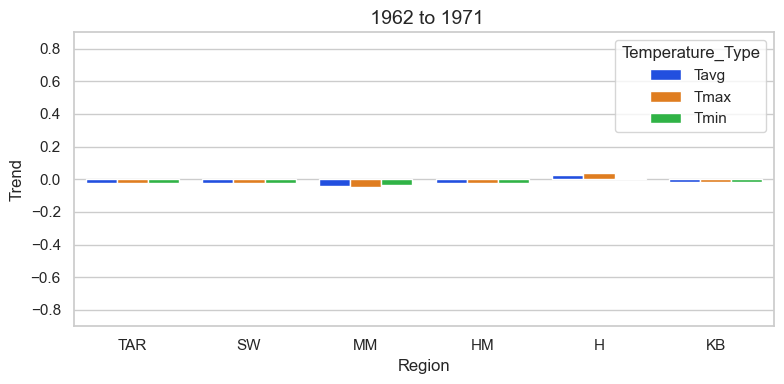

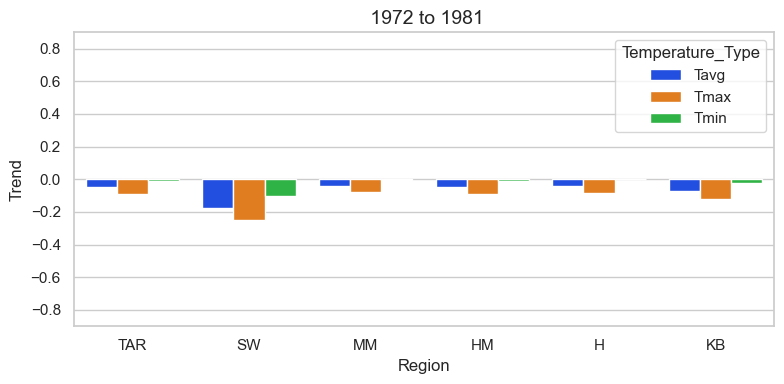

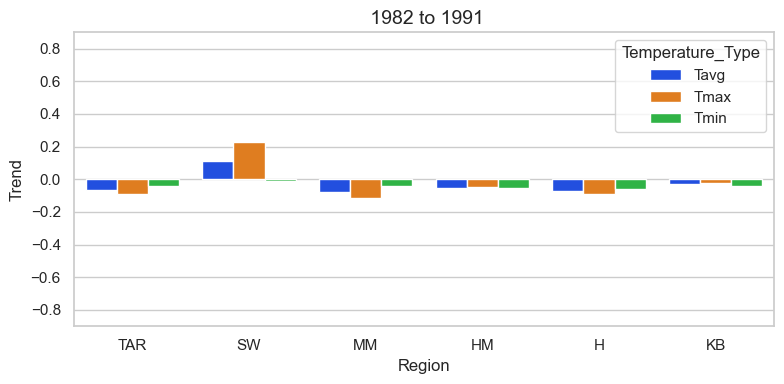

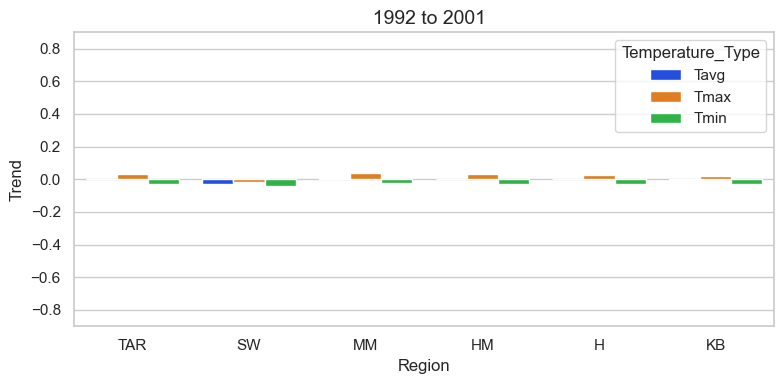

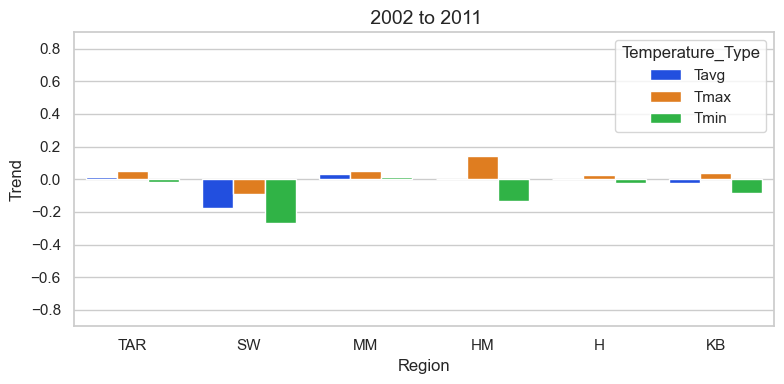

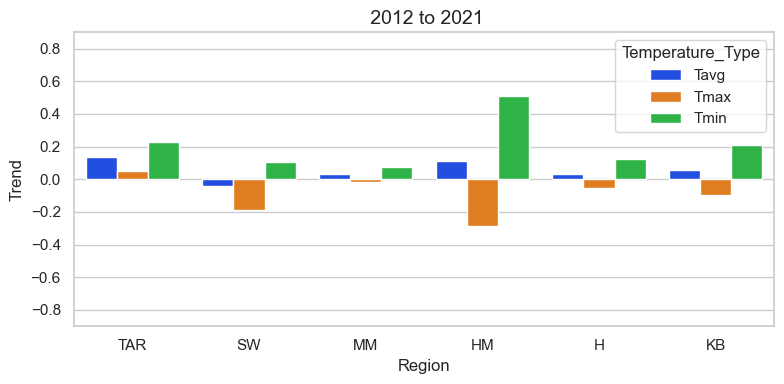

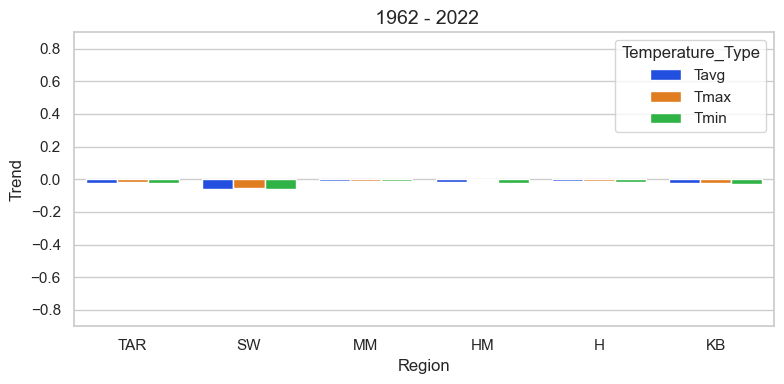

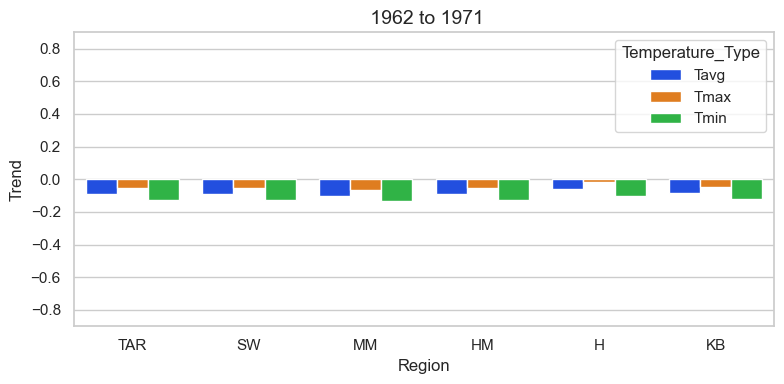

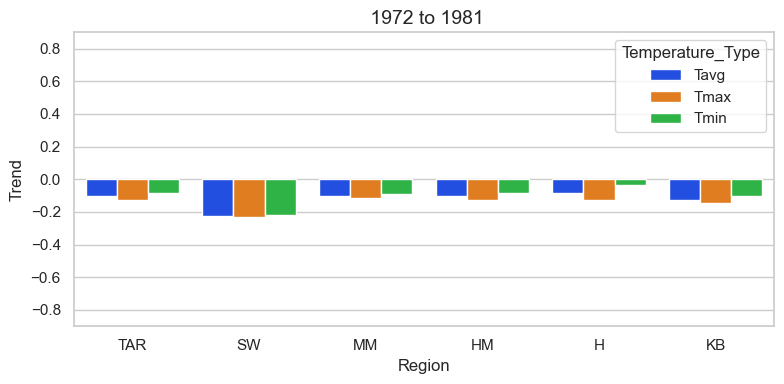

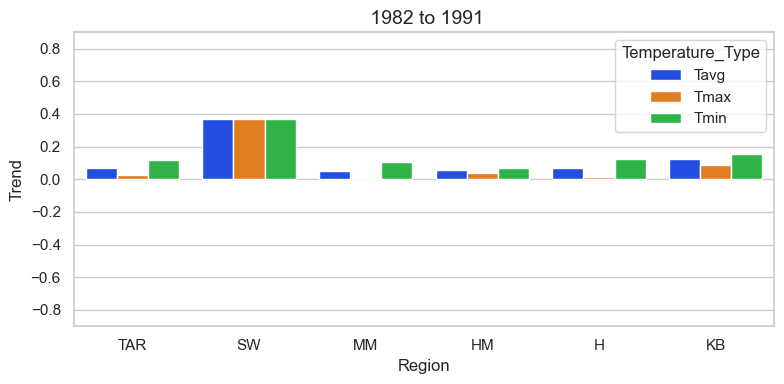

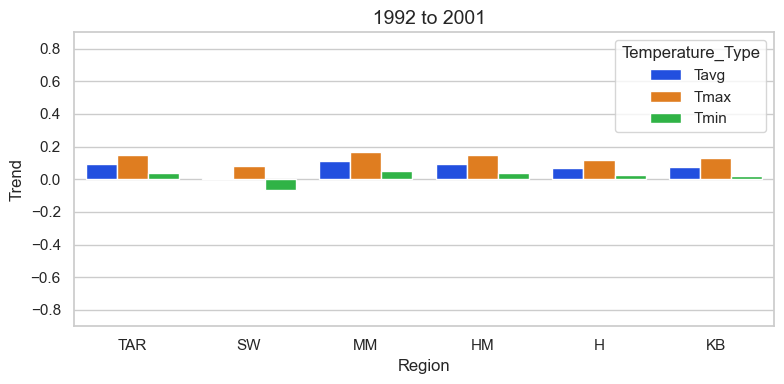

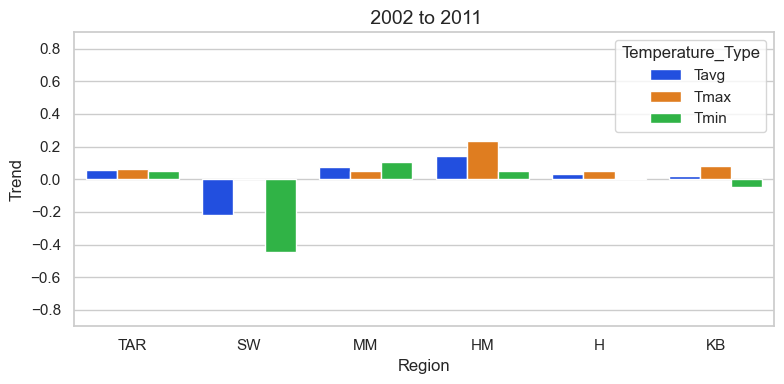

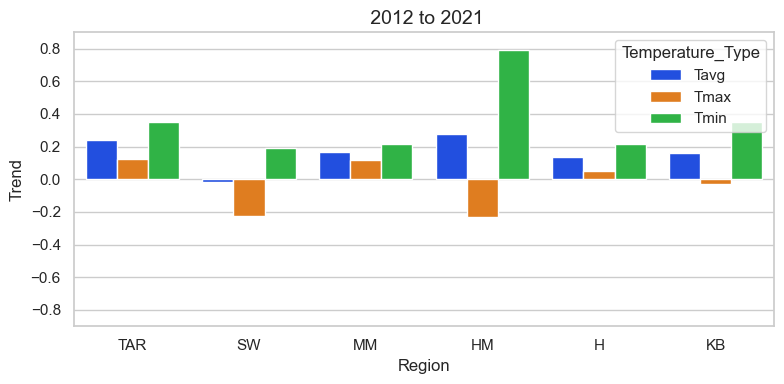

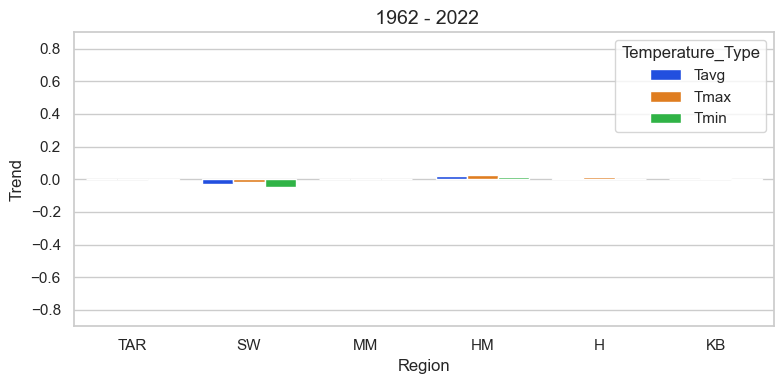

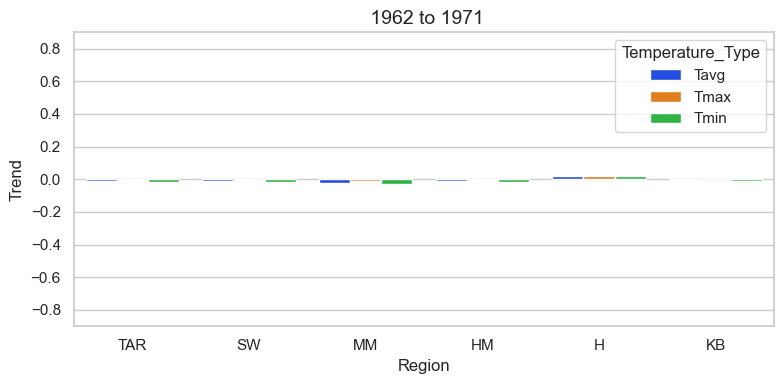

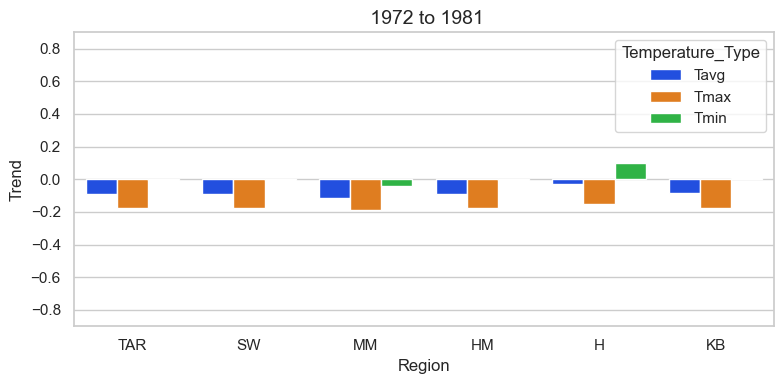

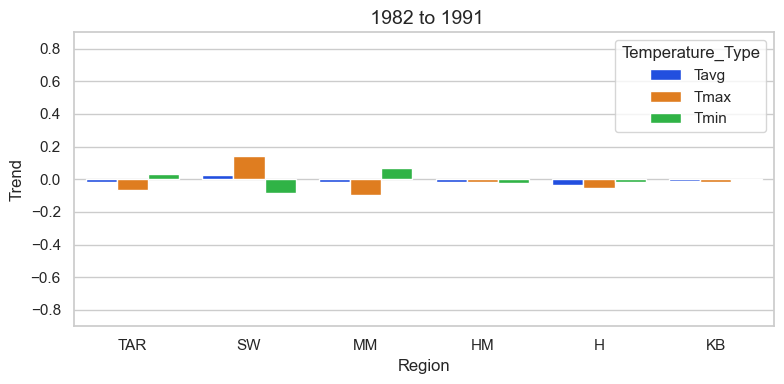

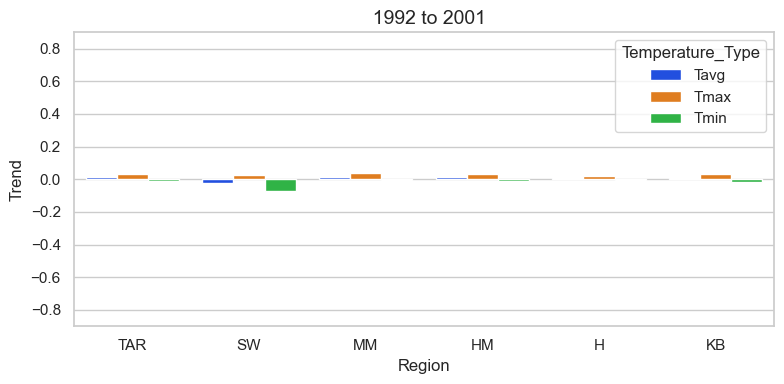

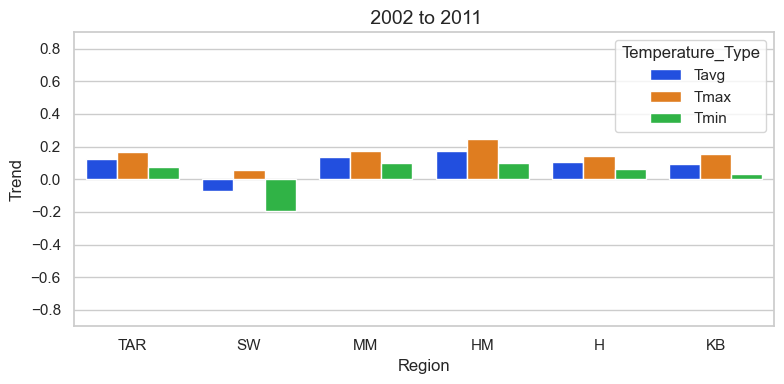

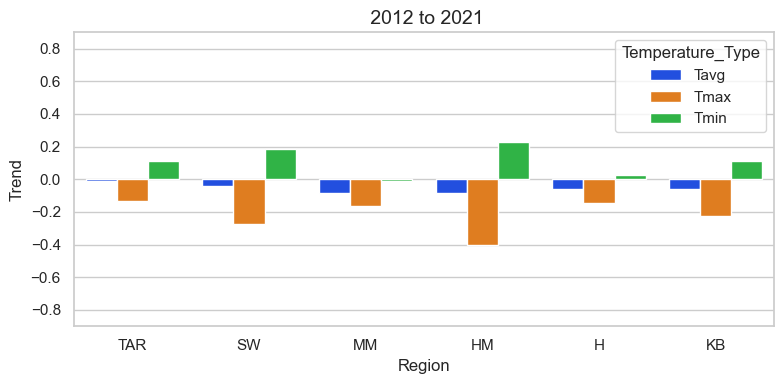

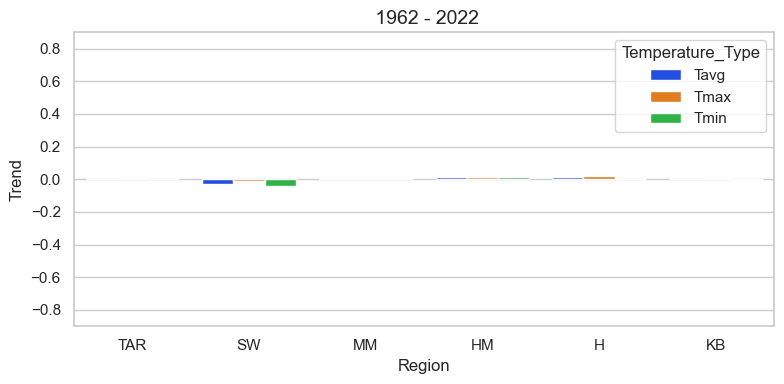

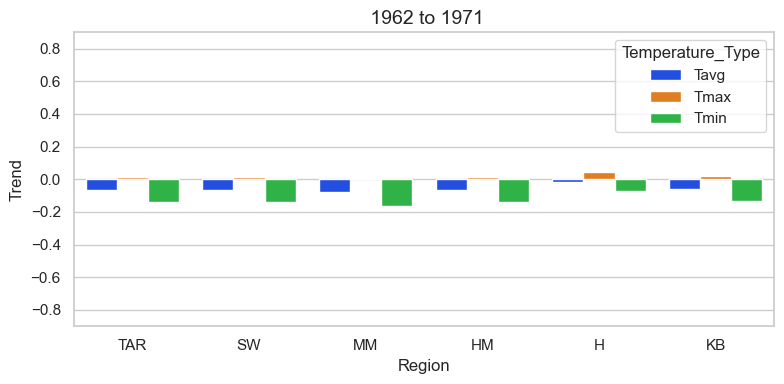

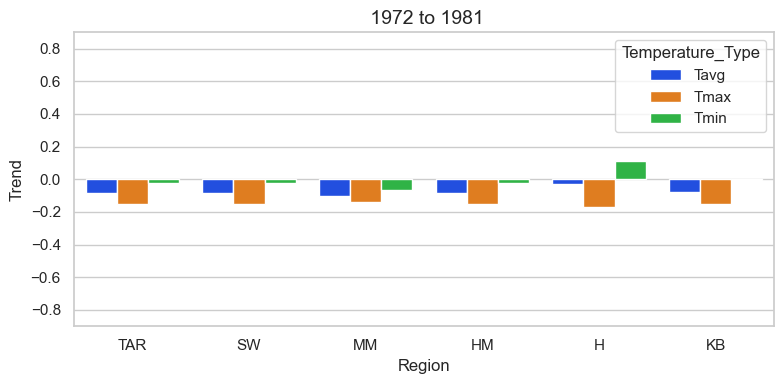

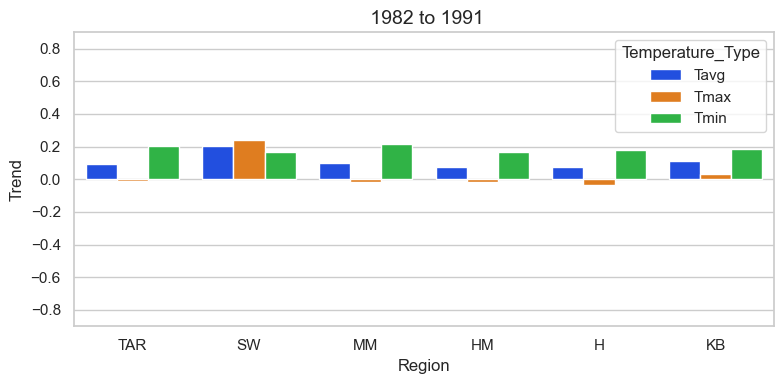

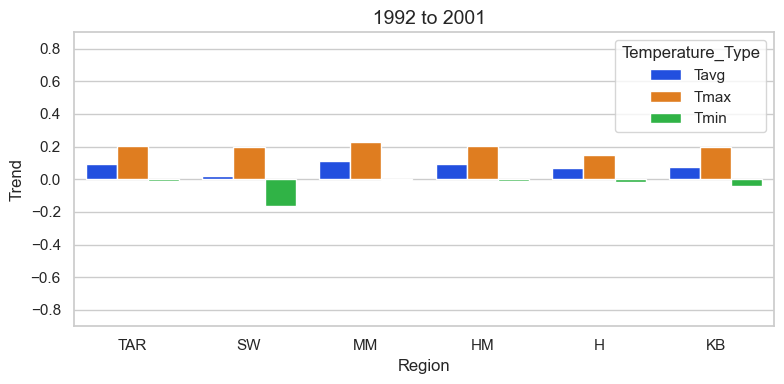

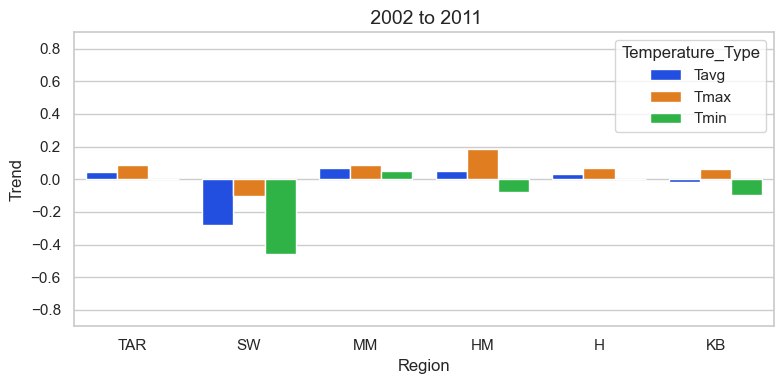

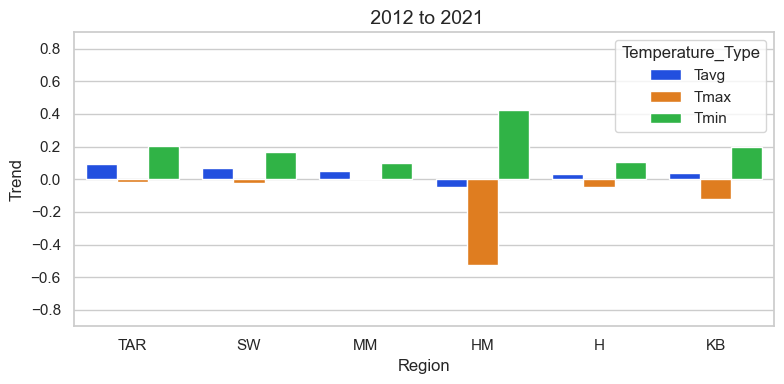

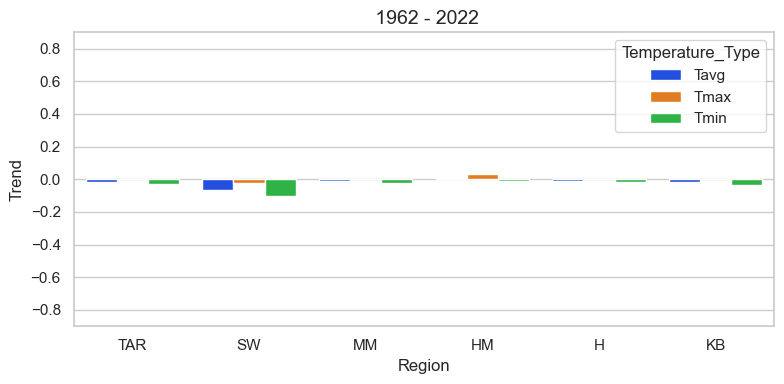

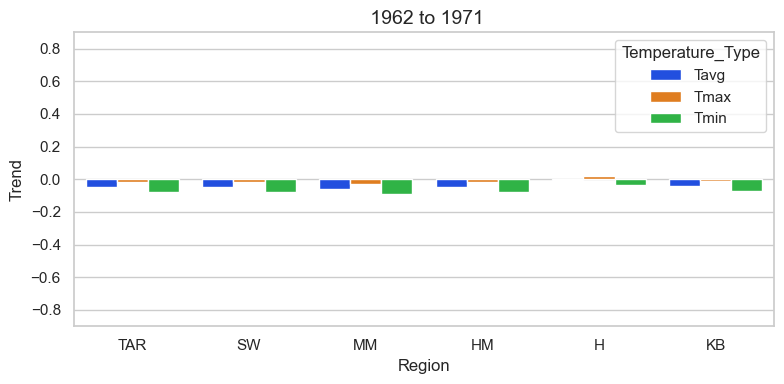

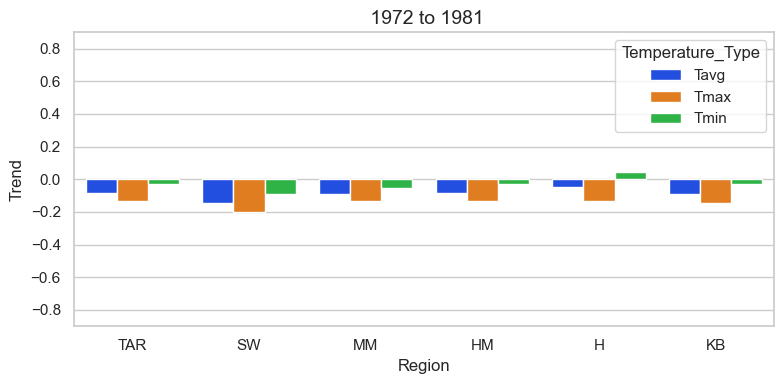

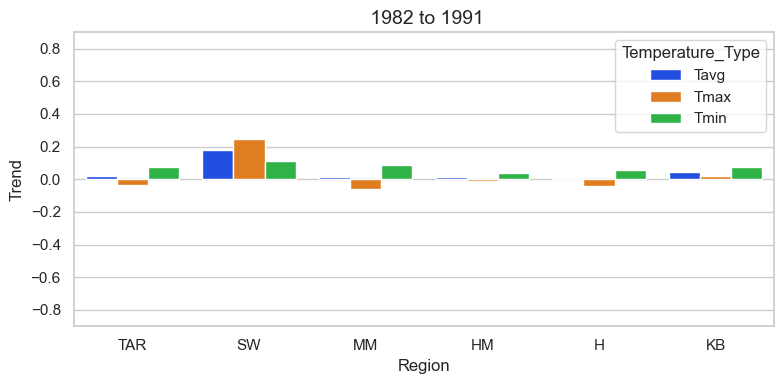

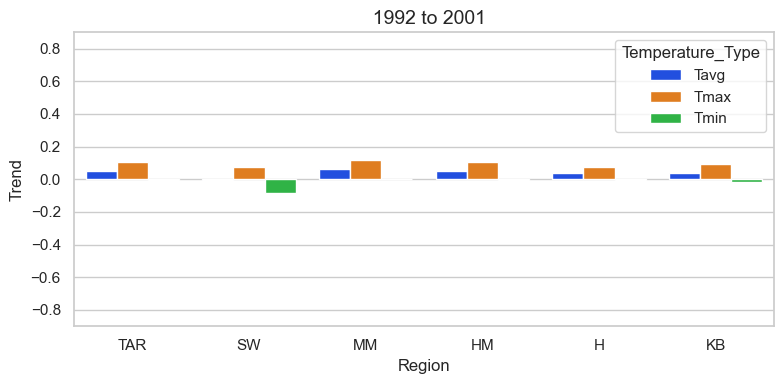

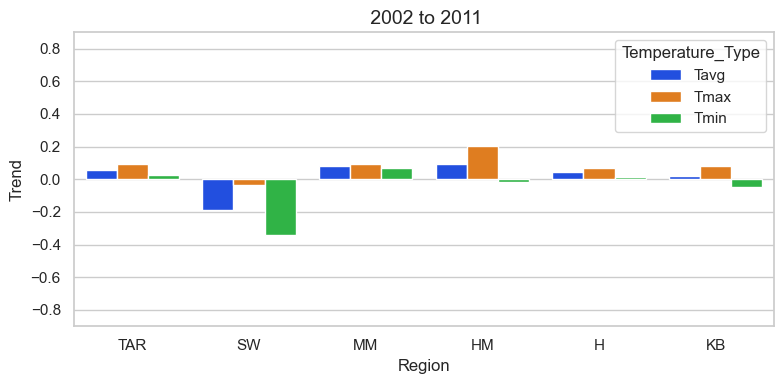

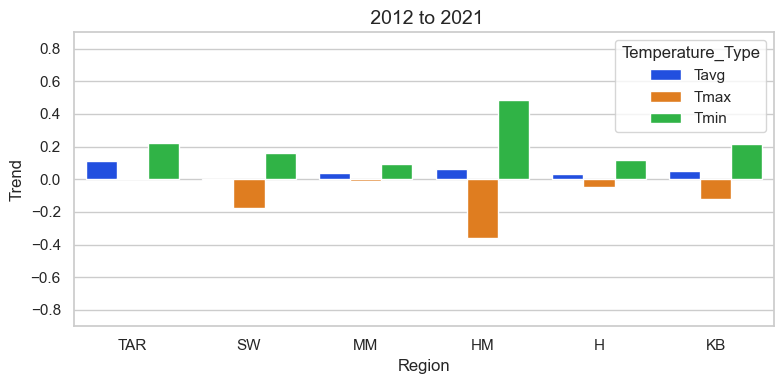

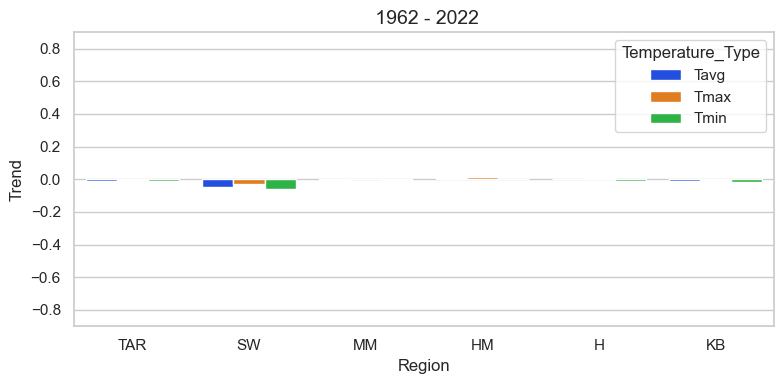

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Define the order of the 'Region' categories
region_order = ['TAR', 'SW', 'MM', 'HM', 'H', 'KB' ]  



# Set plot style for publication
sns.set(style="whitegrid")

# Calculate global min and max for y-axis limits using modulus
global_min = -0.9
global_max = 0.9

# Get unique seasons and decades
unique_seasons = df_long['Season'].unique()
unique_decades = df_long['Decade'].unique()

# Create plots for each combination of season and decade
for season in unique_seasons:
    for decade in unique_decades:
        # Filter data for each decade and season
        df_filtered = df_long[(df_long['Decade'] == decade) & (df_long['Season'] == season)]
        
        # Create a new figure for each combination
        plt.figure(figsize=(8, 4))
        
        # Create the bar plot (histogram) for the current season and decade
        sns.barplot(data=df_filtered, x='Region', y='Trend', hue='Temperature_Type', palette='bright', order=region_order)
        
        # Set y-axis limits based on global min and max
        plt.ylim(global_min, global_max)
        
        # Set the plot title
        #plt.title(f'{season} ({decade})', fontsize=14)
        plt.title(f' {decade}', fontsize=14)
        
        # Set common x and y axis labels
        plt.xlabel('Region', fontsize=12)
        plt.ylabel('Trend', fontsize=12)
        
        # Rotate x-axis labels for better readability
        #plt.xticks(rotation=45)
        
        # Add a single legend for the entire plot
        plt.legend(title='Temperature_Type', loc='upper right')
        
        # Adjust layout to avoid overlap
        plt.tight_layout()
        
        
        file_name = f"{season}_Trend_{decade}.png"
        file_path = r'G:\fresh_start\paper\code_paper\plots\decades_plots\simple_plot'

        # Ensure the correct separator is added between the path and file name
        full_path = file_path + '\\' + file_name  # Use a backslash for Windows paths or `/` for cross-platform

        # Save the plot
        plt.savefig(full_path, dpi=600)
        
        # Show the plot
        plt.show()


# log plot

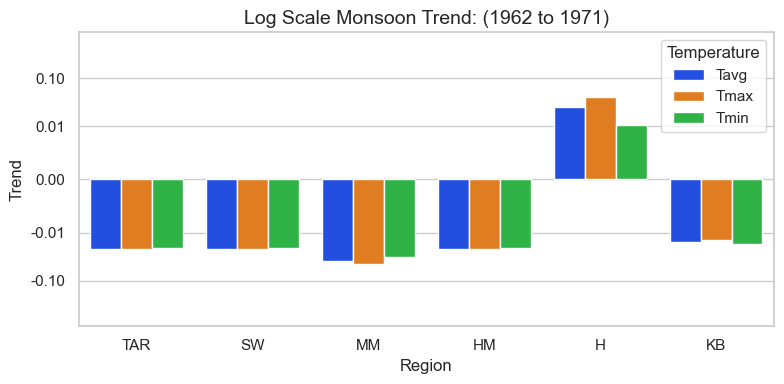

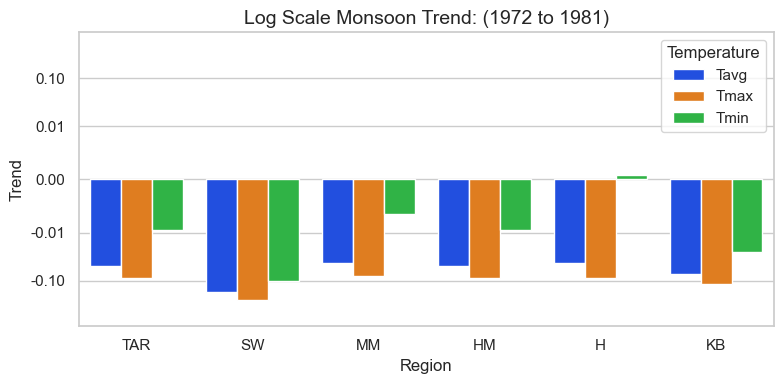

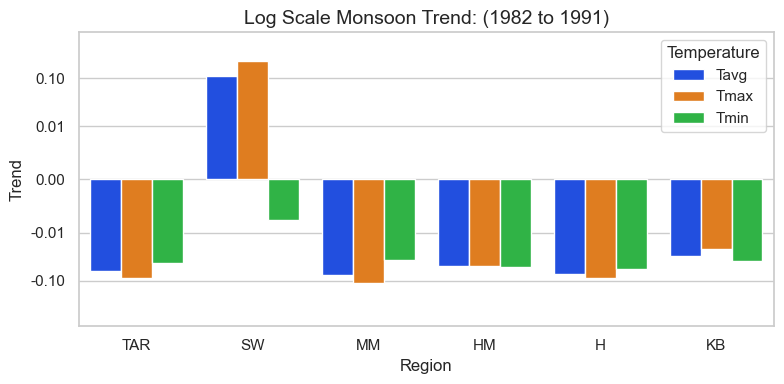

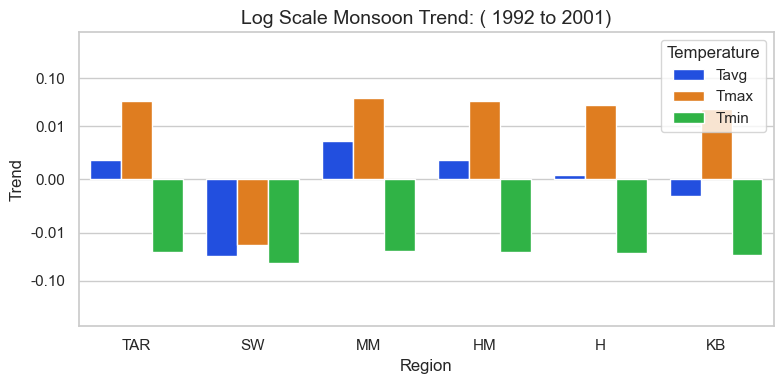

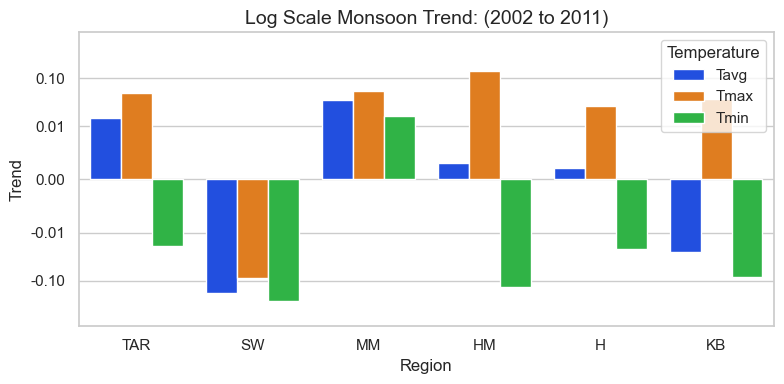

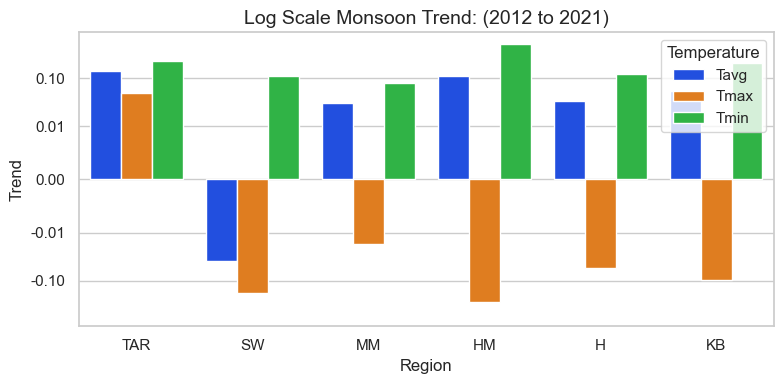

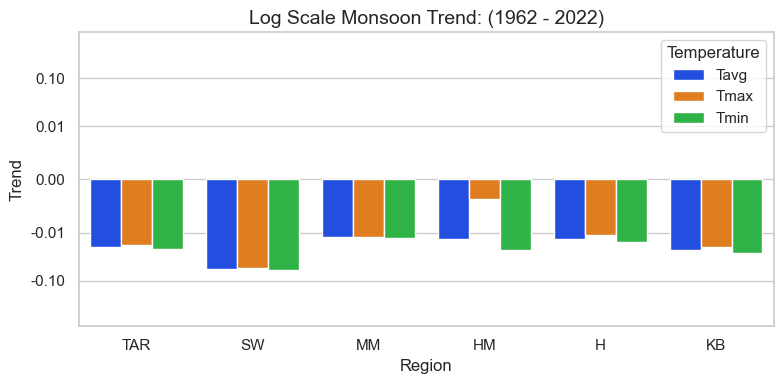

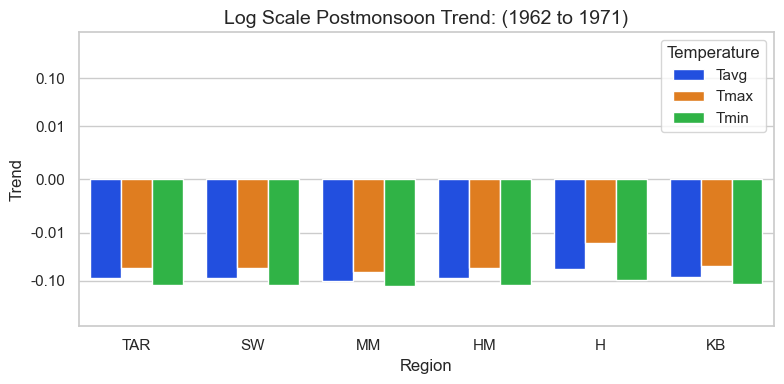

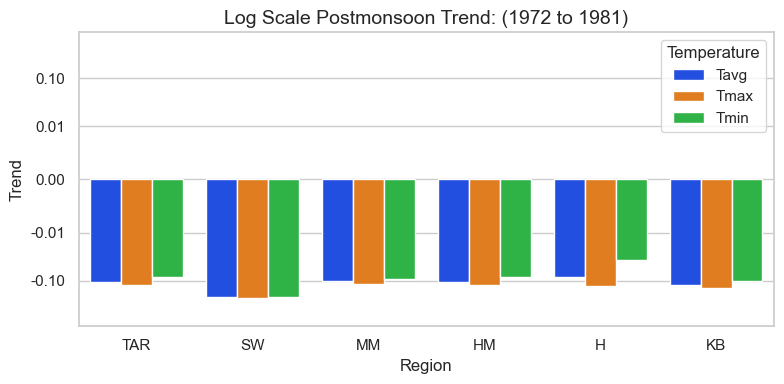

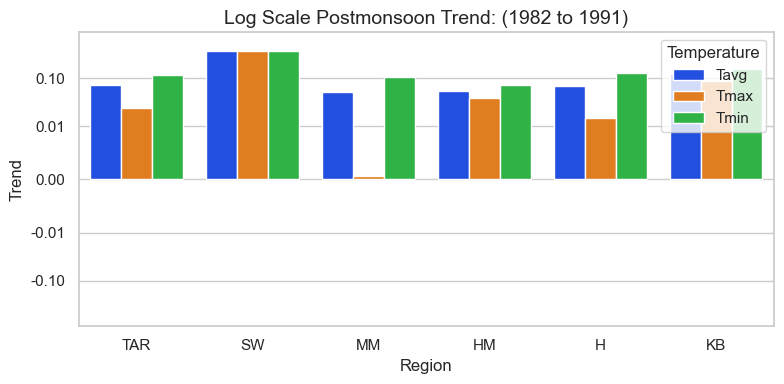

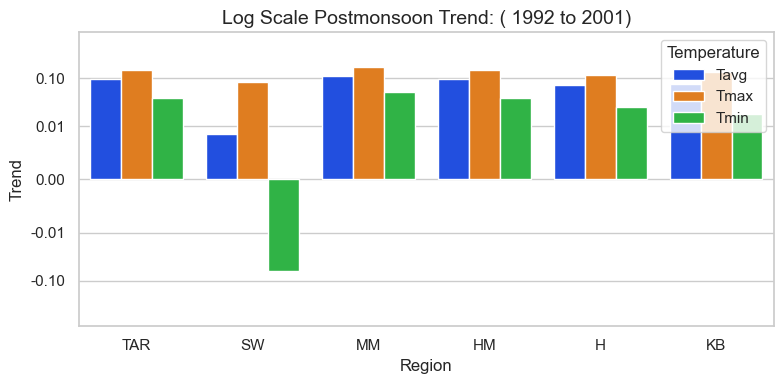

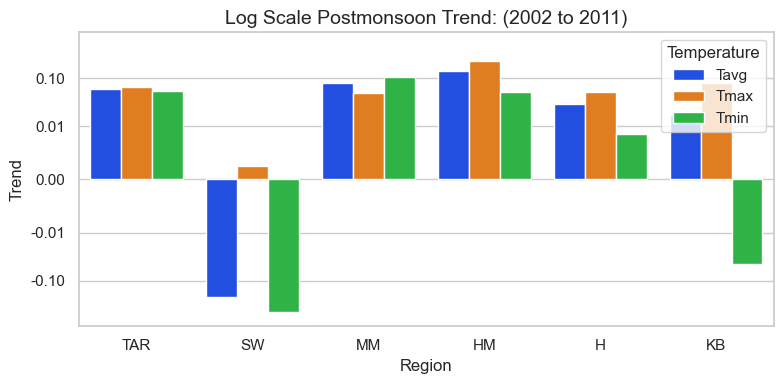

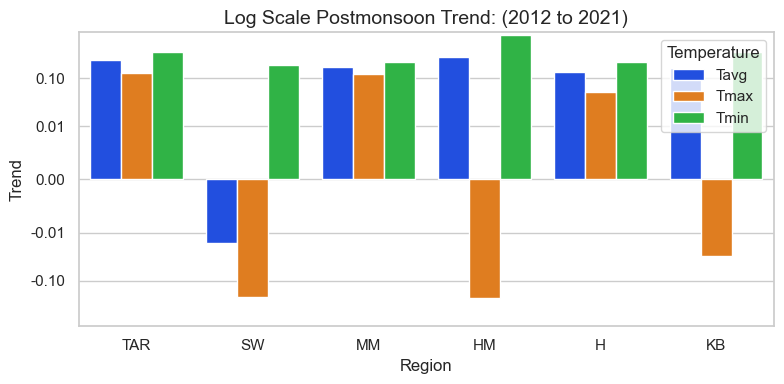

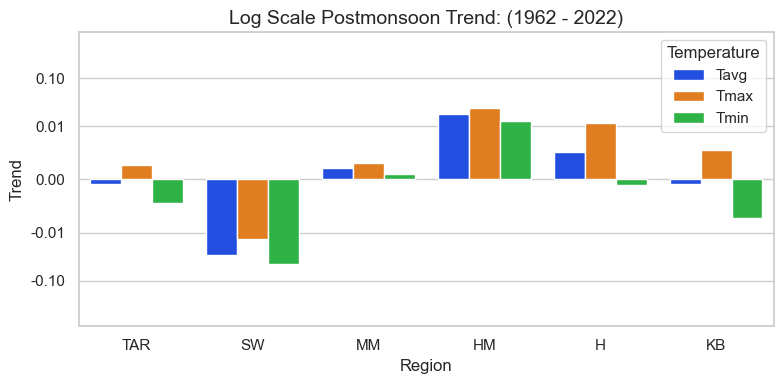

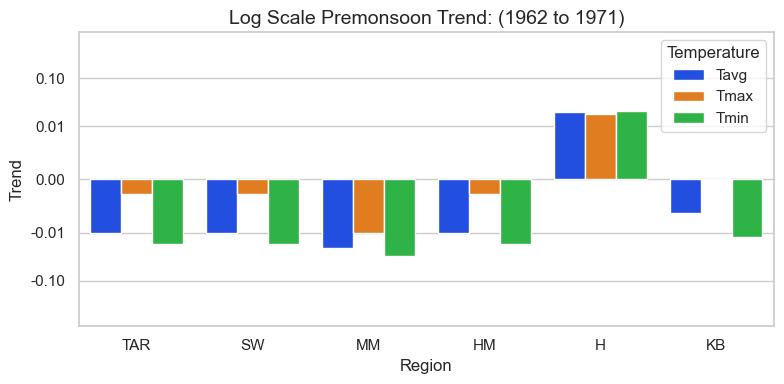

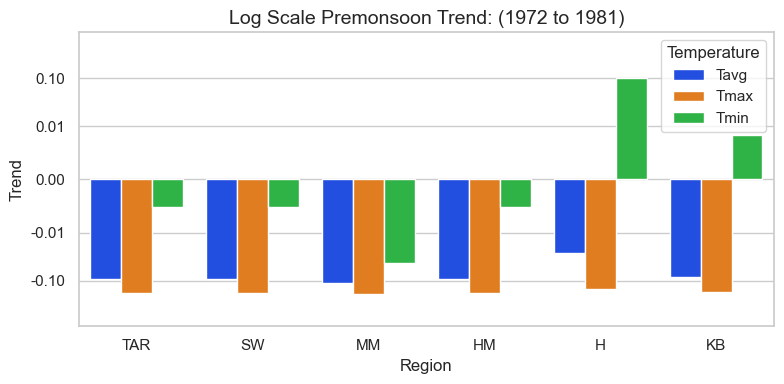

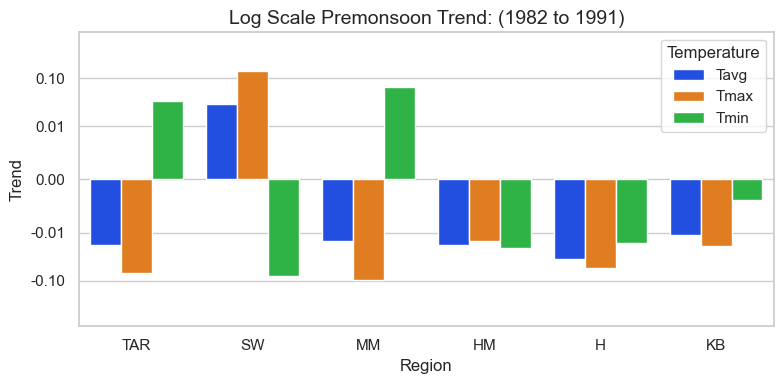

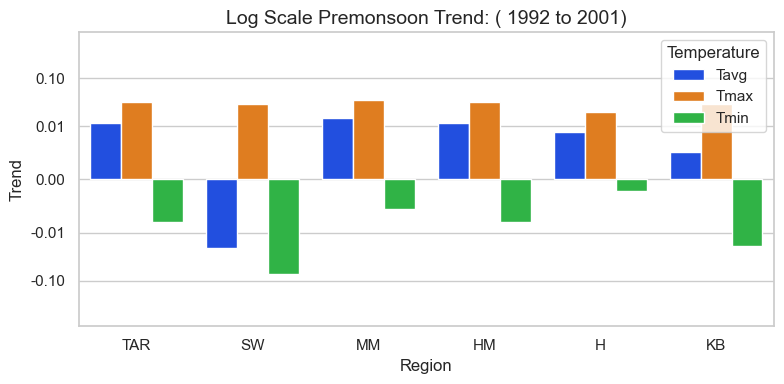

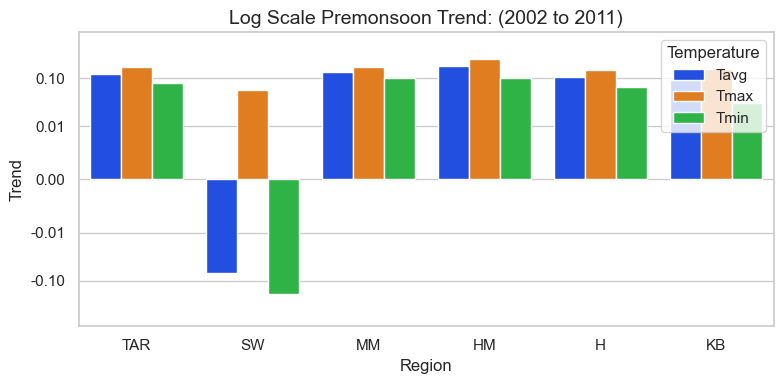

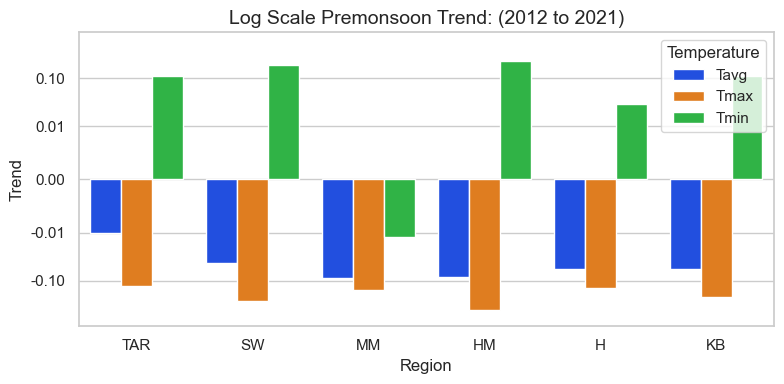

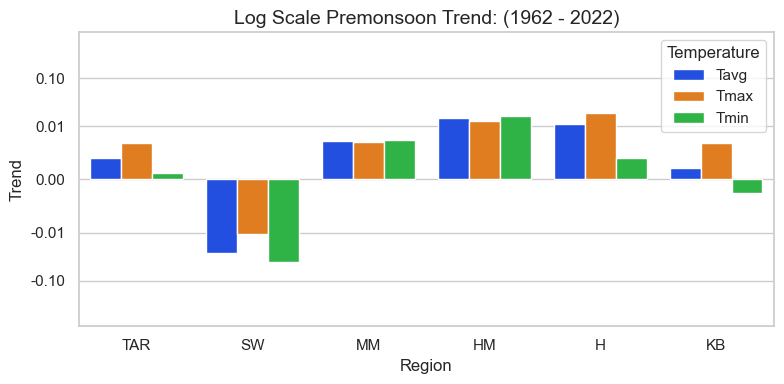

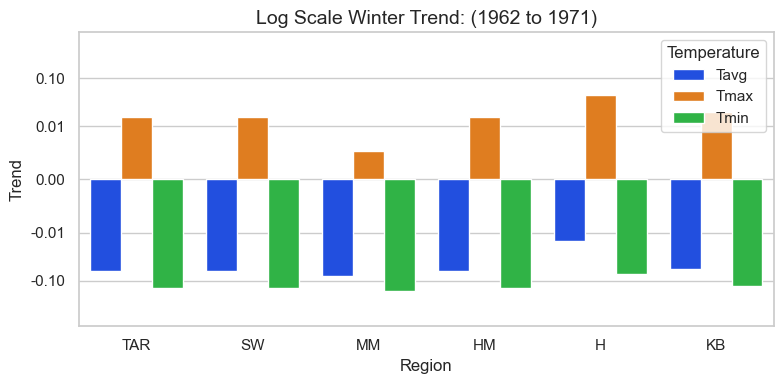

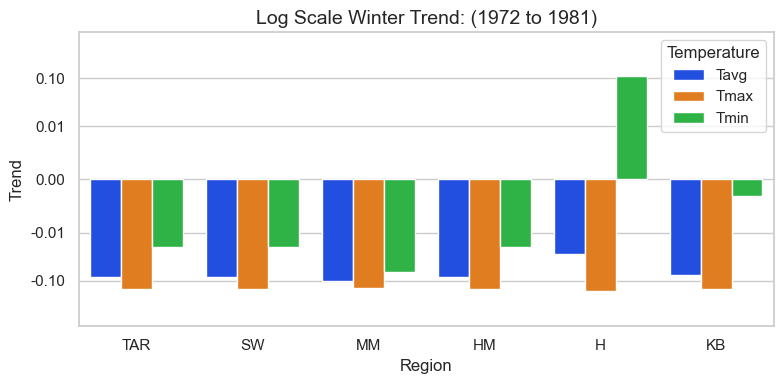

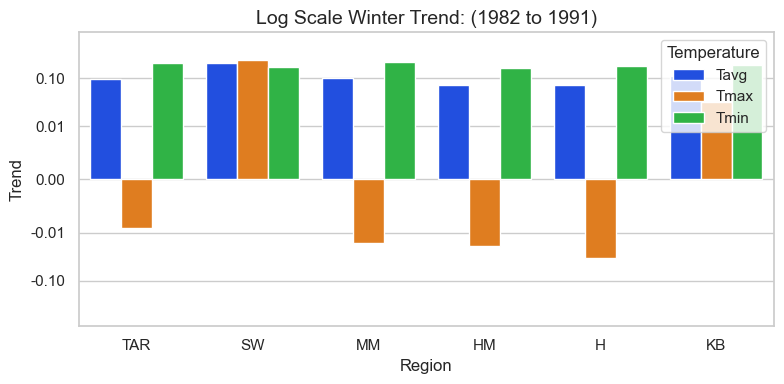

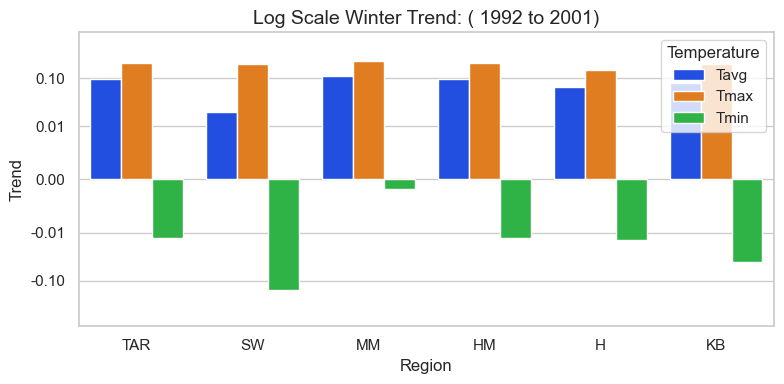

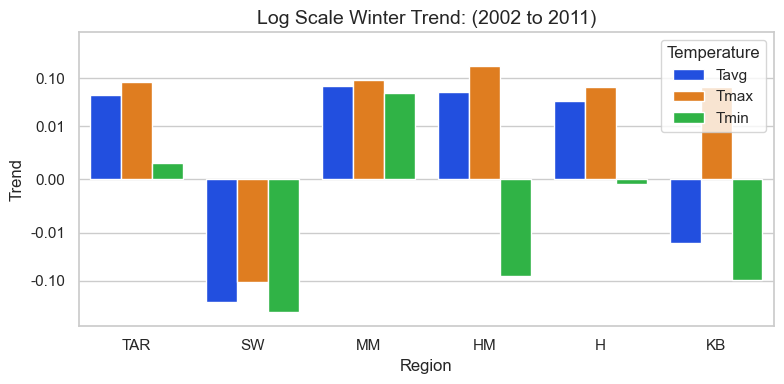

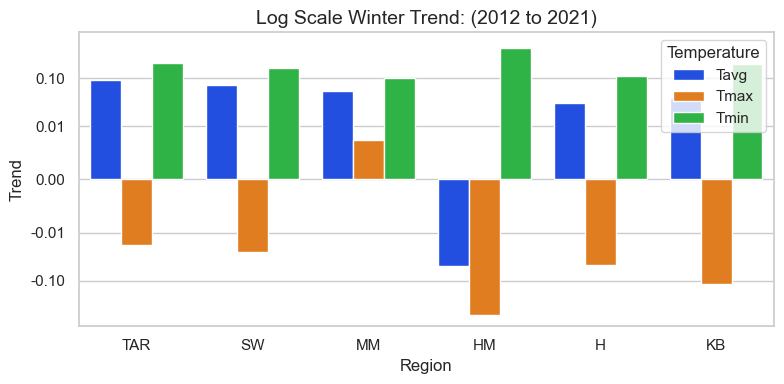

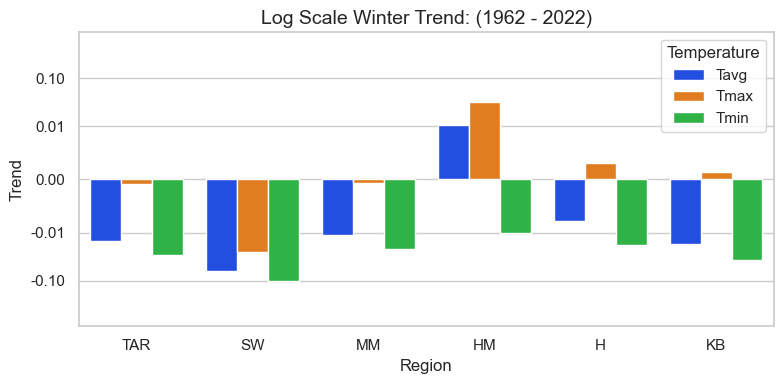

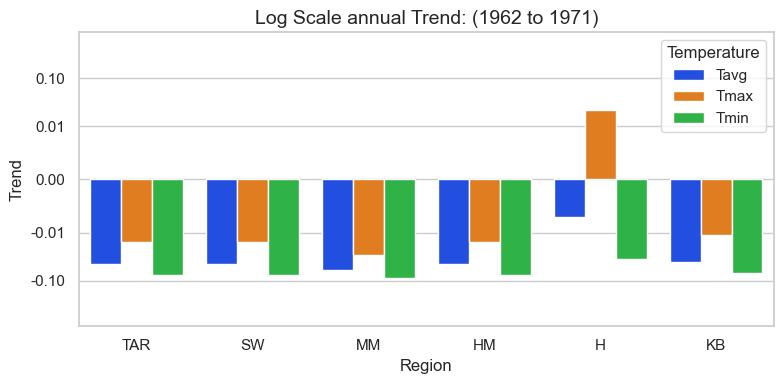

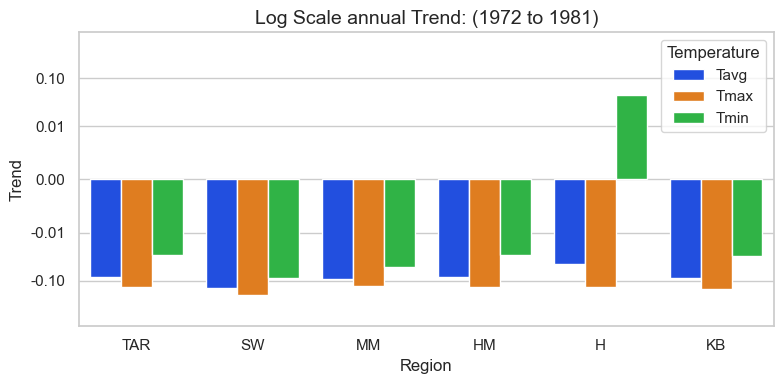

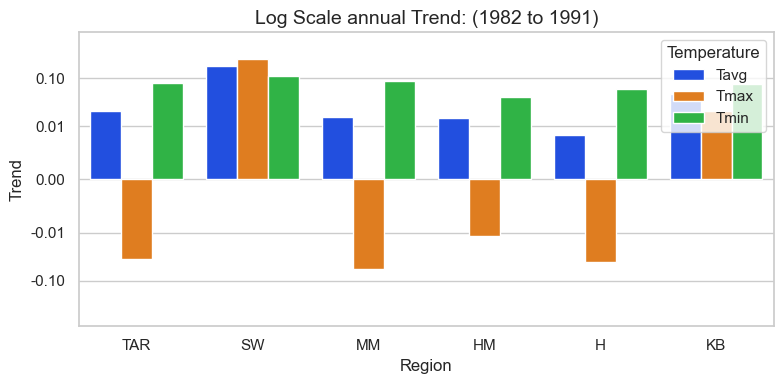

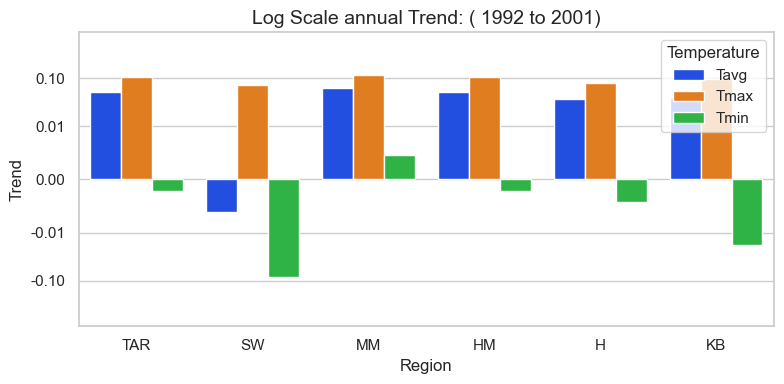

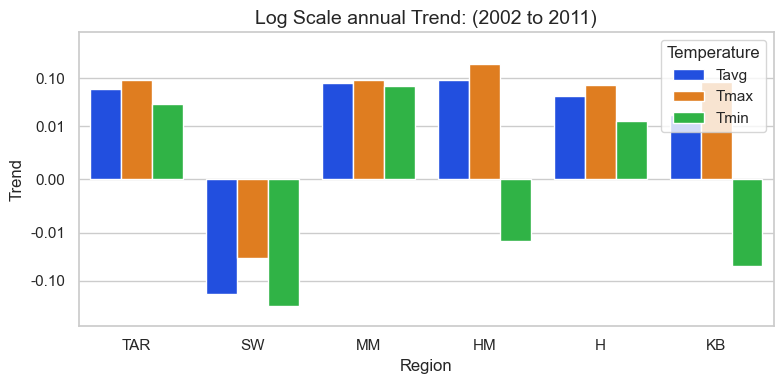

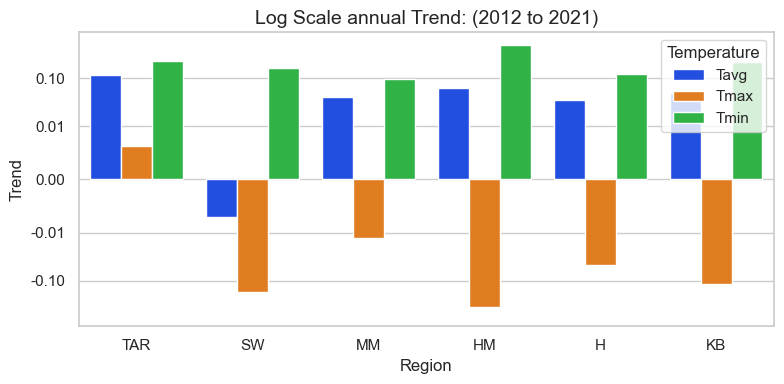

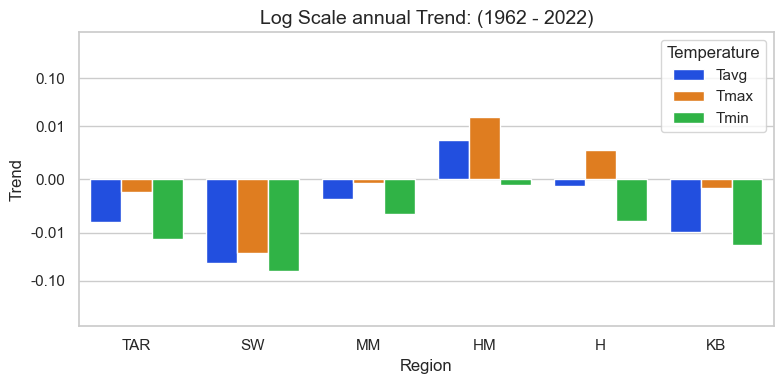

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

# Define the order of the 'Region' categories
region_order = ['TAR', 'SW',  'MM', 'HM', 'H', 'KB' ]  # Adjust the abbreviations as required
# Set plot style for publication
sns.set(style="whitegrid")

# Function to format y-axis ticks with decimals instead of scientific notation
def log_tick_formatter(val, pos=None):
    return f'{val:.2f}'

# Calculate global min and max for y-axis limits using modulus
global_min = -0.9
global_max = 0.9

# Get unique seasons and decades
unique_seasons = df_long['Season'].unique()
unique_decades = df_long['Decade'].unique()

# Create plots for each combination of season and decade
for season in unique_seasons:
    for decade in unique_decades:
        # Filter data for each decade and season
        df_filtered = df_long[(df_long['Decade'] == decade) & (df_long['Season'] == season)]
        
        # Create a new figure for each combination
        plt.figure(figsize=(8, 4))
        
        # Create the bar plot (histogram) for the current season and decade
        sns.barplot(data=df_filtered, x='Region', y='Trend', hue='Temperature_Type', palette='bright', order=region_order)
        
        # Set y-axis limits based on global min and max
        plt.ylim(global_min, global_max)
        
        # Apply symmetric log scale on the y-axis
        plt.yscale('symlog', linthresh=0.01)  
        # Linthresh defines the range around 0 for linear scaling

        # Apply custom decimal formatting to the y-axis labels
        plt.gca().yaxis.set_major_formatter(FuncFormatter(log_tick_formatter))
        
        # Set the plot title
        plt.title(f'Log Scale {season} Trend: ({decade})', fontsize=14)
        
        # Set common x and y axis labels
        plt.xlabel('Region', fontsize=12)
        plt.ylabel('Trend', fontsize=12)
        
        # Rotate x-axis labels for better readability
        #plt.xticks(rotation=45)
        
        # Add a single legend for the entire plot
        plt.legend(title='Temperature', loc='upper right')
        
        # Adjust layout to avoid overlap
        plt.tight_layout()
        
        # File path to save the plot
        file_name = f"log_plot_{season}_Trend_{decade}.png"
        file_path = r'G:\fresh_start\paper\code_paper\plots\decades_plots\log_plot'

        # Ensure the correct separator is added between the path and file name
        full_path = file_path + '\\' + file_name  # Use a backslash for Windows paths or `/` for cross-platform

        # Save the plot
        plt.savefig(full_path, dpi=600)
        
        # Show the plot
        plt.show()


# log Plot 2

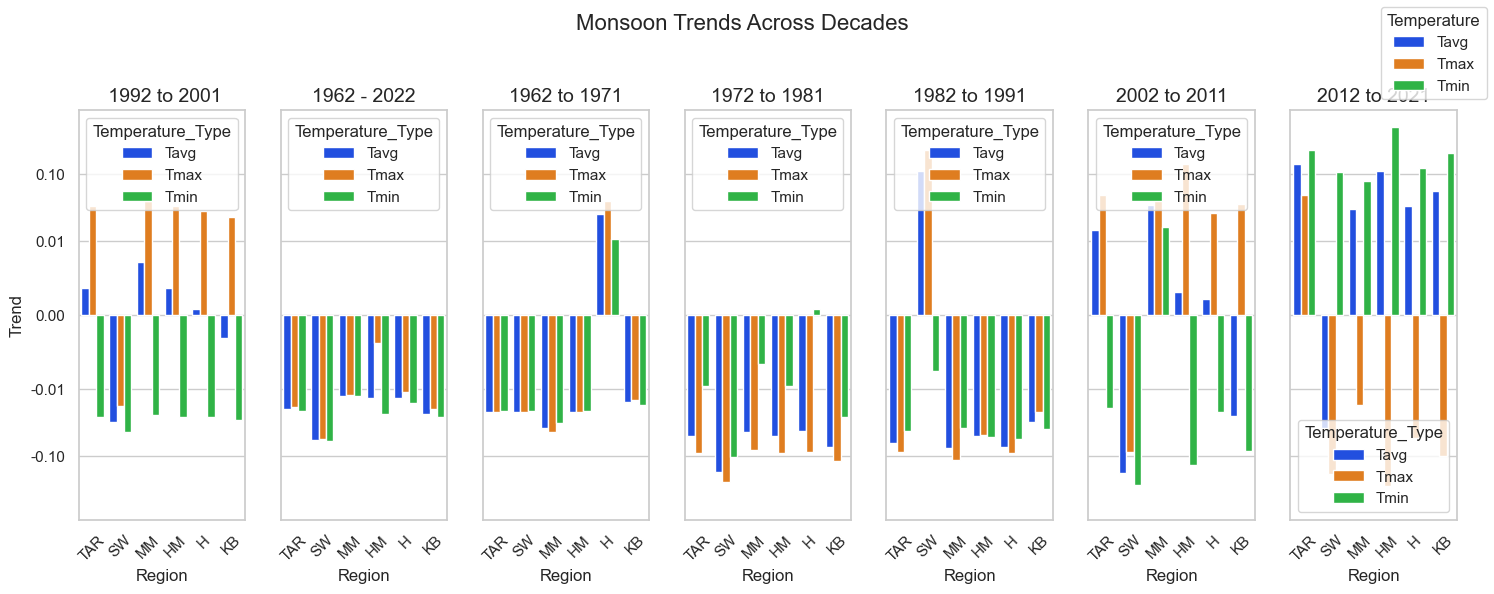

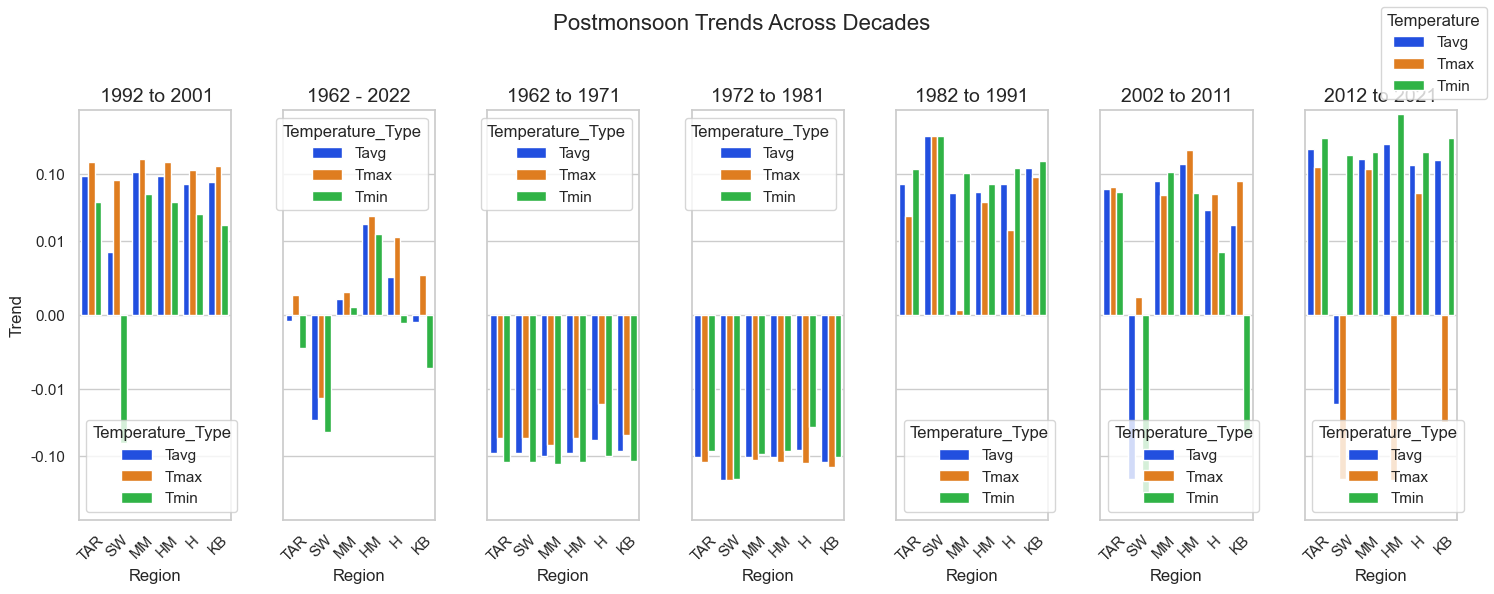

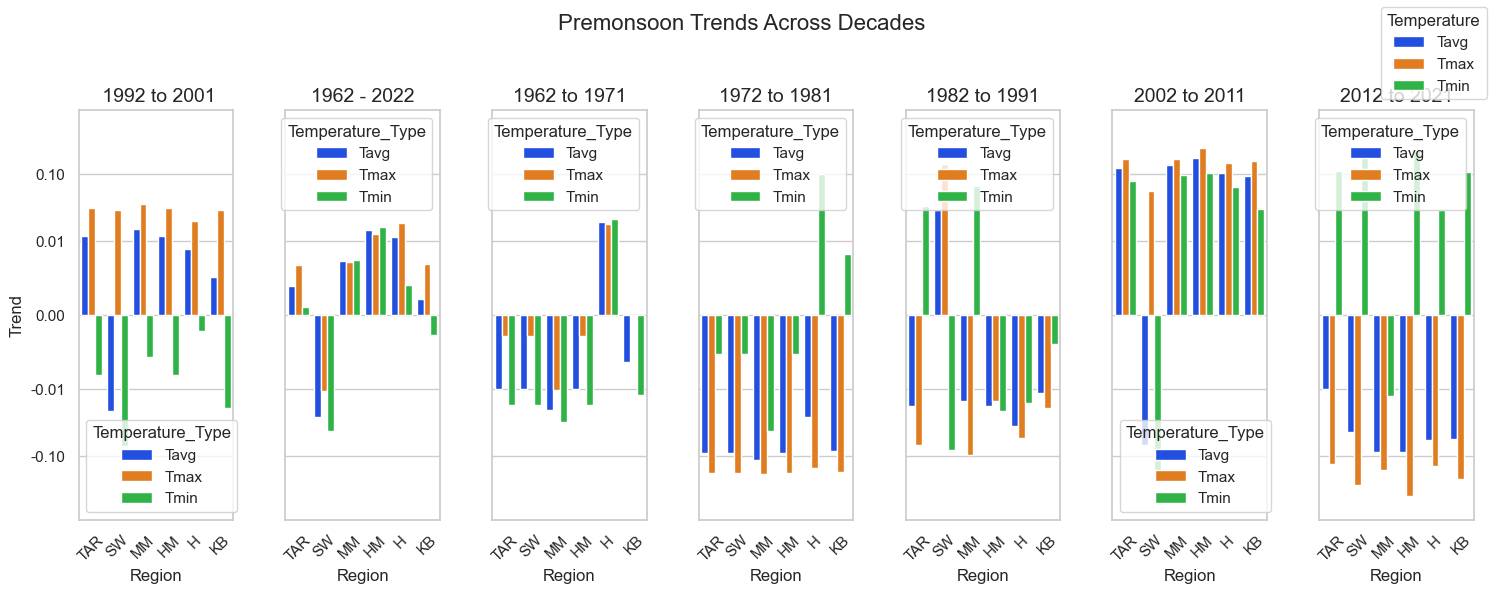

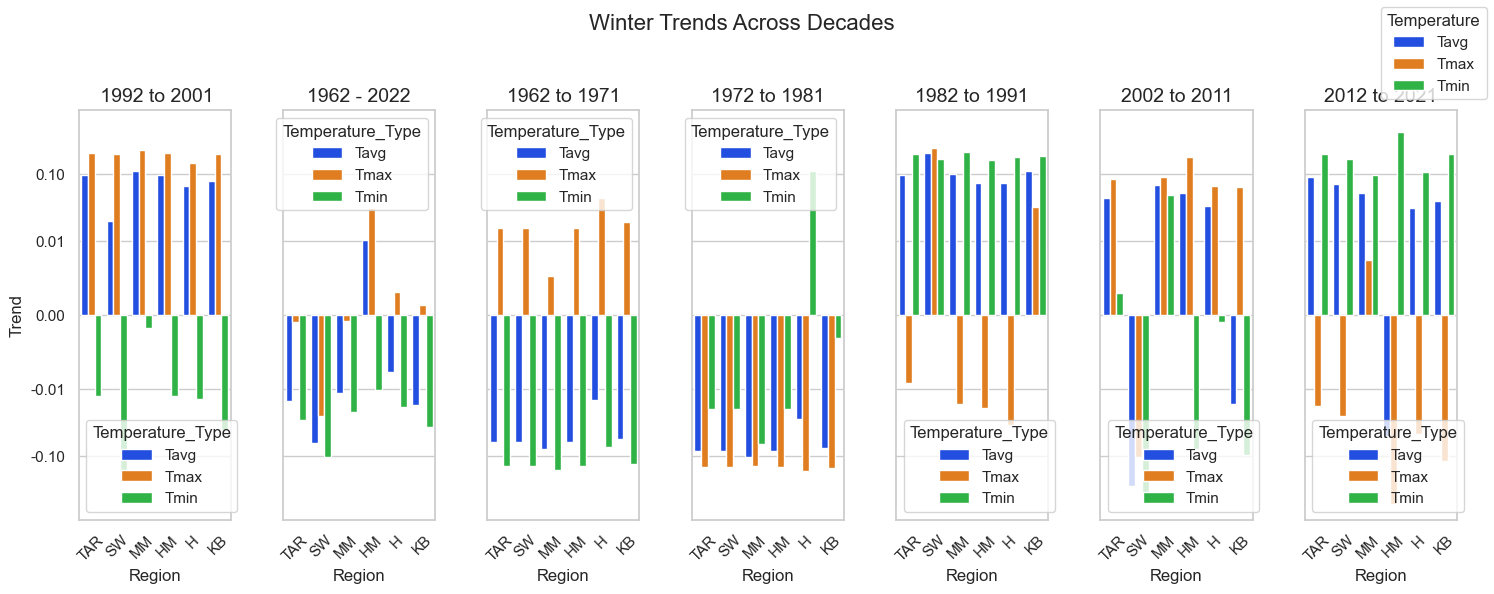

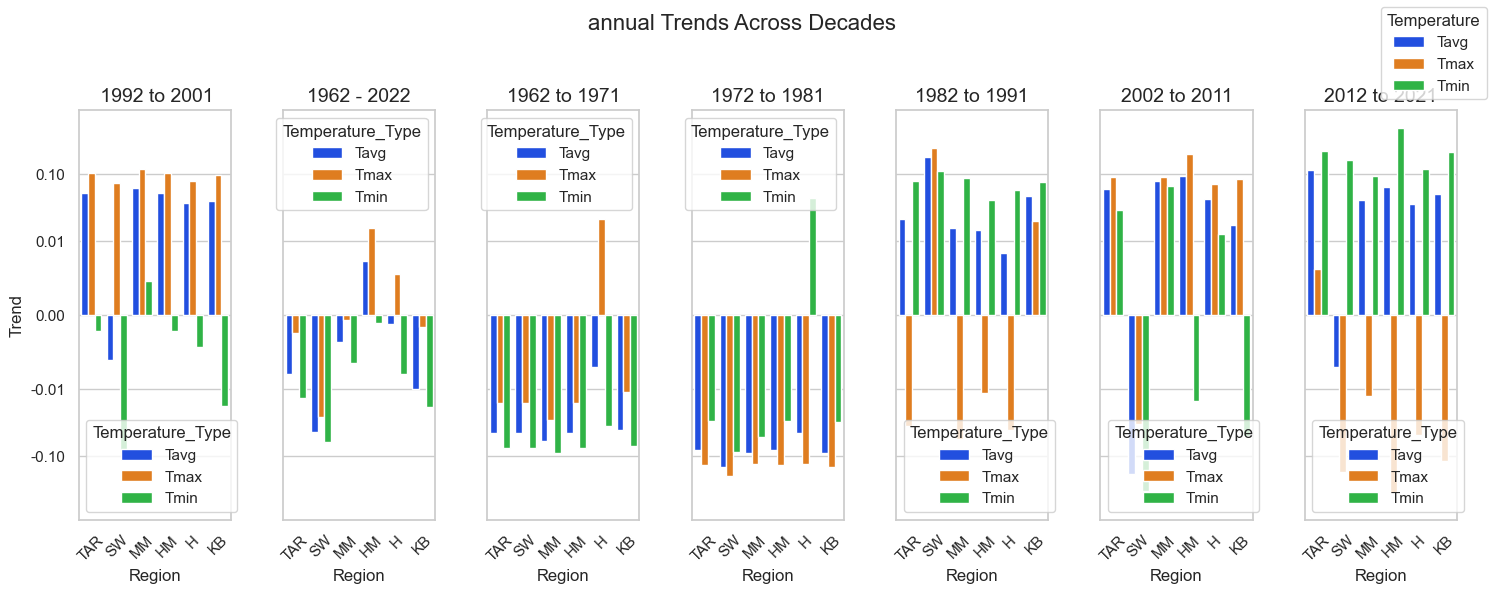

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

# Define the order of the 'Region' categories
region_order = ['TAR', 'SW', 'MM', 'HM', 'H', 'KB']  # Adjust the abbreviations as required

# Set plot style for publication
sns.set(style="whitegrid")

# Function to format y-axis ticks with decimals instead of scientific notation
def log_tick_formatter(val, pos=None):
    return f'{val:.2f}'

# Calculate global min and max for y-axis limits using modulus
global_min = -0.9
global_max = 0.9

# Get unique seasons and decades
unique_seasons = df_long['Season'].unique()
unique_decades = sorted(df_long['Decade'].unique())  # Sort decades for chronological order

# Create plots for each season with subplots for decades
for season in unique_seasons:
    # Create a figure for each season
    fig, axes = plt.subplots(nrows=1, ncols=len(unique_decades), figsize=(15, 6), sharey=True)
    
    # Create subplots for each decade
    for i, decade in enumerate(unique_decades):
        # Filter data for each decade and season
        df_filtered = df_long[(df_long['Decade'] == decade) & (df_long['Season'] == season)]
        
        # Create the bar plot for the current season and decade
        sns.barplot(
            data=df_filtered, x='Region', y='Trend', hue='Temperature_Type',
            palette='bright', order=region_order, ax=axes[i]
        )
        
        # Set y-axis limits based on global min and max
        axes[i].set_ylim(global_min, global_max)
        
        # Apply symmetric log scale on the y-axis
        axes[i].set_yscale('symlog', linthresh=0.01)  # Linthresh defines the range around 0 for linear scaling
        
        # Apply custom decimal formatting to the y-axis labels
        axes[i].yaxis.set_major_formatter(FuncFormatter(log_tick_formatter))
        
        # Set the subplot title
        axes[i].set_title(f'{decade}', fontsize=14)
        
        # Set x-axis label
        axes[i].set_xlabel('Region', fontsize=12)
        
        # Rotate x-axis labels for better readability
        axes[i].tick_params(axis='x', rotation=45)

        # Only add y-axis label for the first subplot
        if i == 0:
            axes[i].set_ylabel('Trend', fontsize=12)

    # Add a single legend for the entire figure
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title='Temperature', loc='upper right')
    
    # Set the overall figure title for the season
    fig.suptitle(f'{season} Trends Across Decades', fontsize=16)
    
    # Adjust layout to avoid overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    

    
    # Show the plot
    plt.show()


# simple plot 2


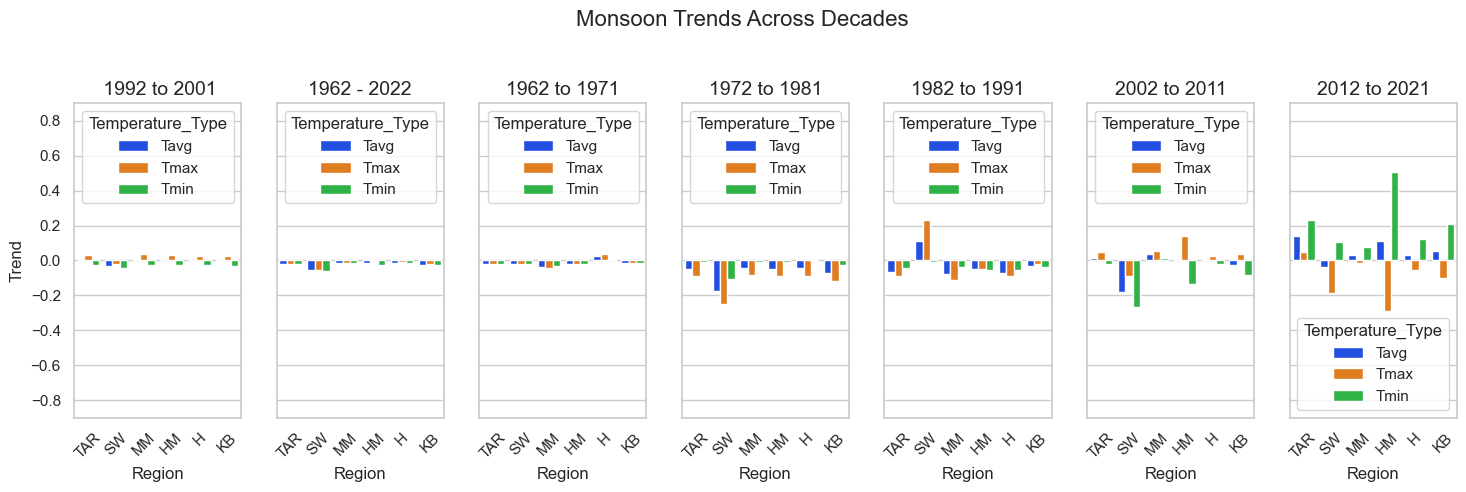

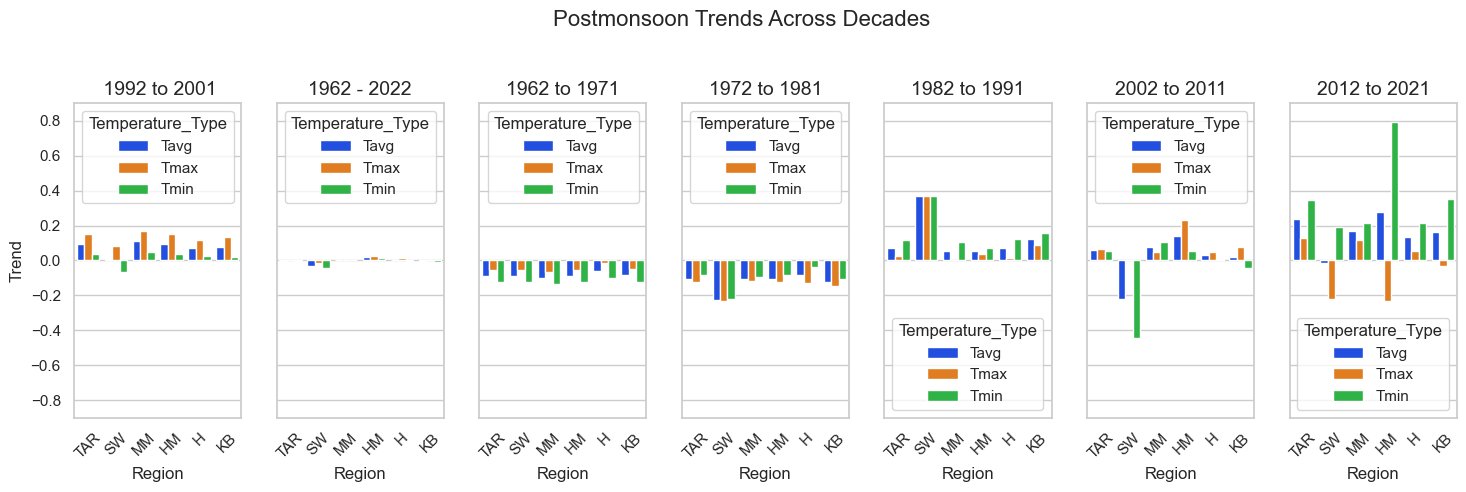

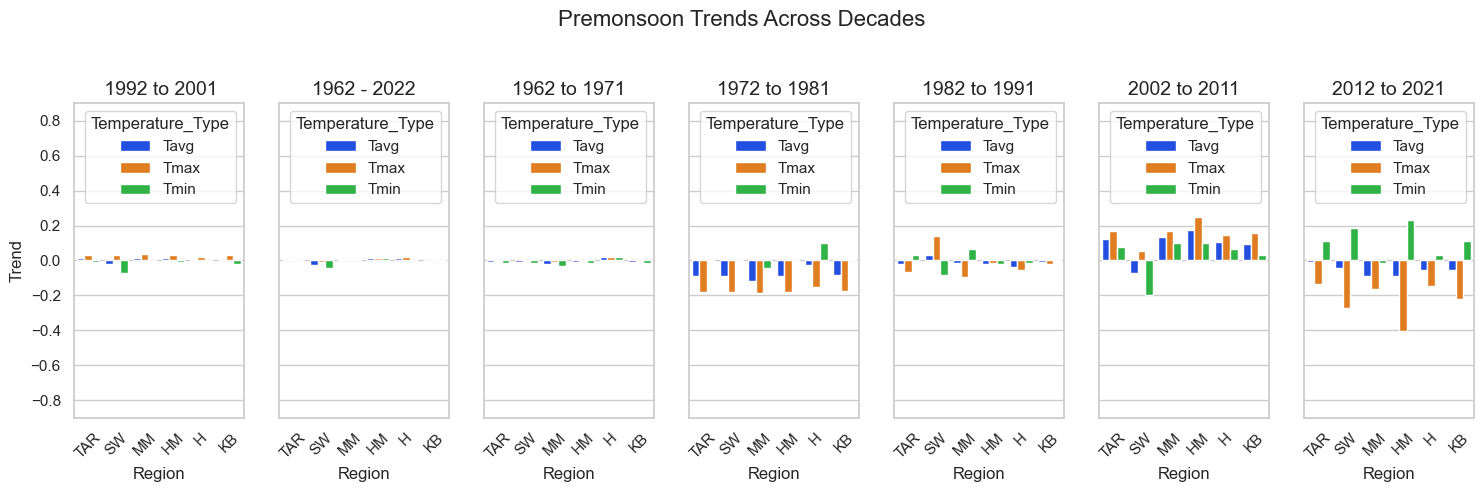

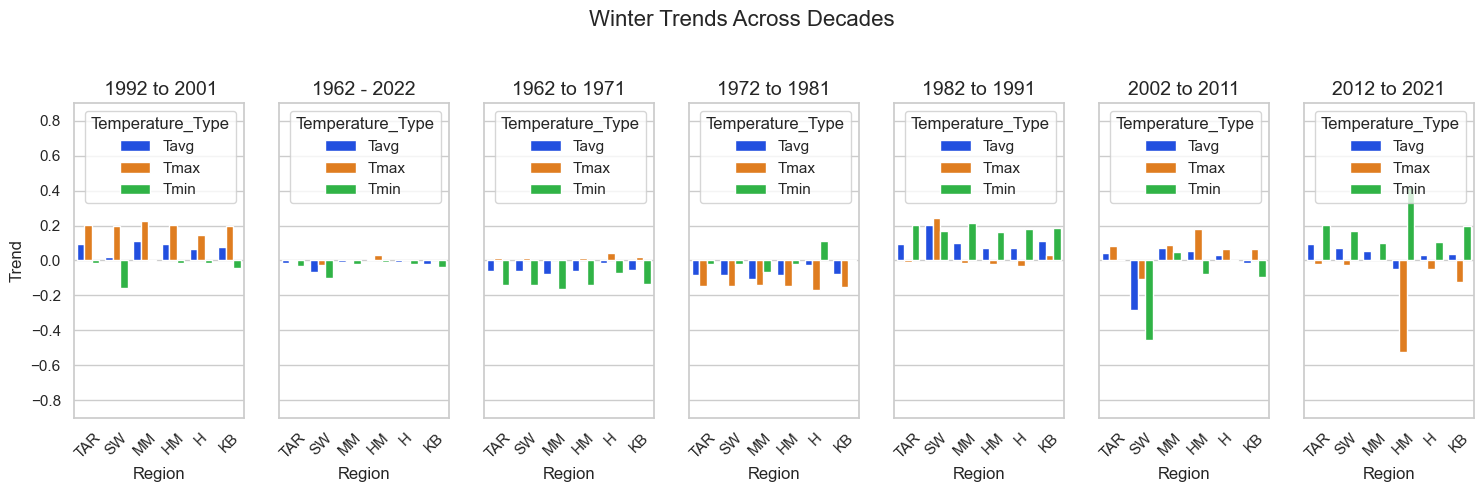

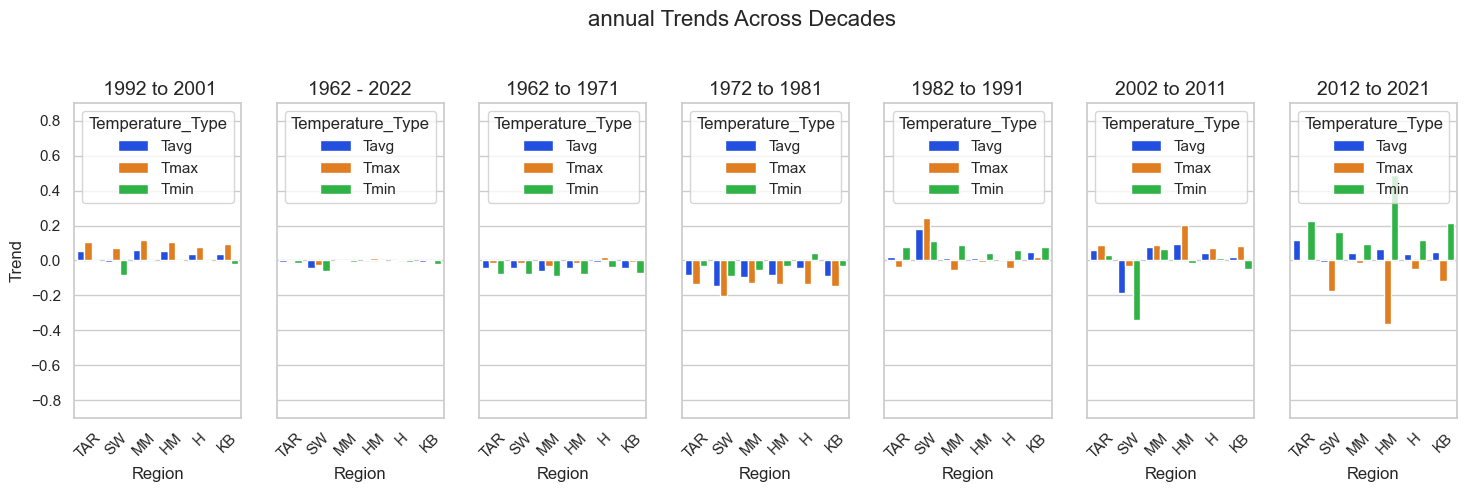

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the order of the 'Region' categories
region_order = ['TAR', 'SW', 'MM', 'HM', 'H', 'KB']  

# Set plot style for publication
sns.set(style="whitegrid")

# Calculate global min and max for y-axis limits
global_min = -0.9
global_max = 0.9

# Get unique seasons and sorted decades
unique_seasons = df_long['Season'].unique()
unique_decades = sorted(df_long['Decade'].unique())  # Sort decades for chronological order

# Create plots for each unique season
for season in unique_seasons:
    # Create a figure for each season with subplots for each decade
    fig, axes = plt.subplots(nrows=1, ncols=len(unique_decades), figsize=(15, 5), sharey=True)
    
    # Create subplots for each decade
    for i, decade in enumerate(unique_decades):
        # Filter data for the current decade and season
        df_filtered = df_long[(df_long['Decade'] == decade) & (df_long['Season'] == season)]
        
        # Create the bar plot for the current season and decade
        sns.barplot(
            data=df_filtered, x='Region', y='Trend', hue='Temperature_Type',
            palette='bright', order=region_order, ax=axes[i]
        )
        
        # Set y-axis limits based on global min and max
        axes[i].set_ylim(global_min, global_max)
        
        # Set the subplot title
        axes[i].set_title(f'{decade}', fontsize=14)
        
        # Set common x-axis label
        axes[i].set_xlabel('Region', fontsize=12)
        
        # Rotate x-axis labels for better readability
        axes[i].tick_params(axis='x', rotation=45)
        
        # Only add y-axis label for the first subplot
        if i == 0:
            axes[i].set_ylabel('Trend', fontsize=12)

    # Add a single legend for the entire figure
    handles, labels = axes[0].get_legend_handles_labels()
    #fig.legend(handles, labels, title='Temperature Type', loc='upper right')
    
    # Set the overall figure title for the season
    fig.suptitle(f'{season} Trends Across Decades', fontsize=16)
    
    # Adjust layout to avoid overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to fit the title
    
    # Show the plot
    plt.show()


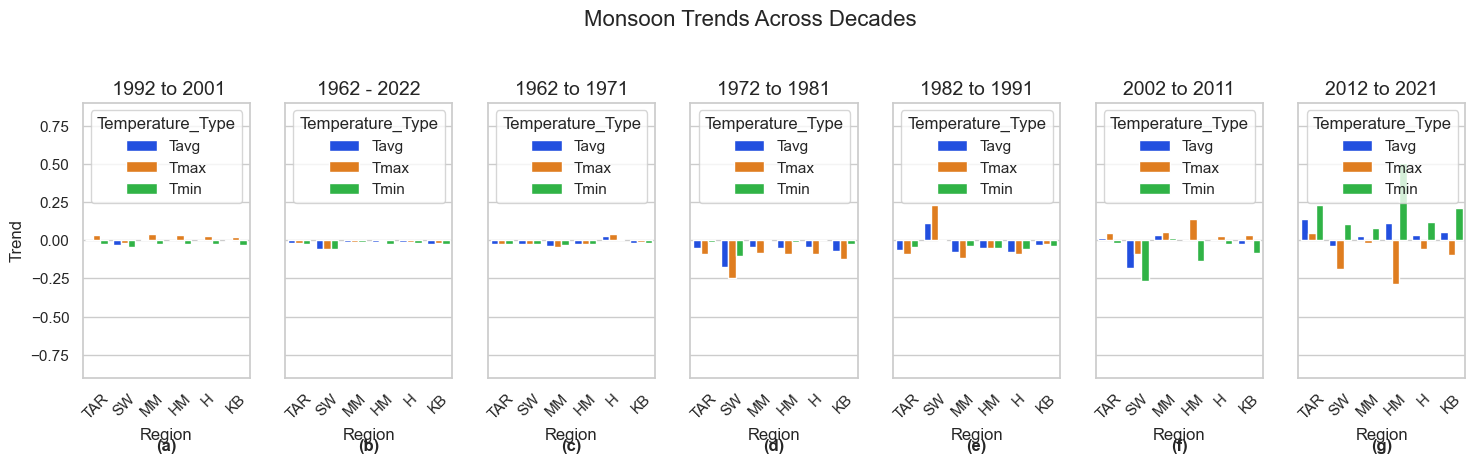

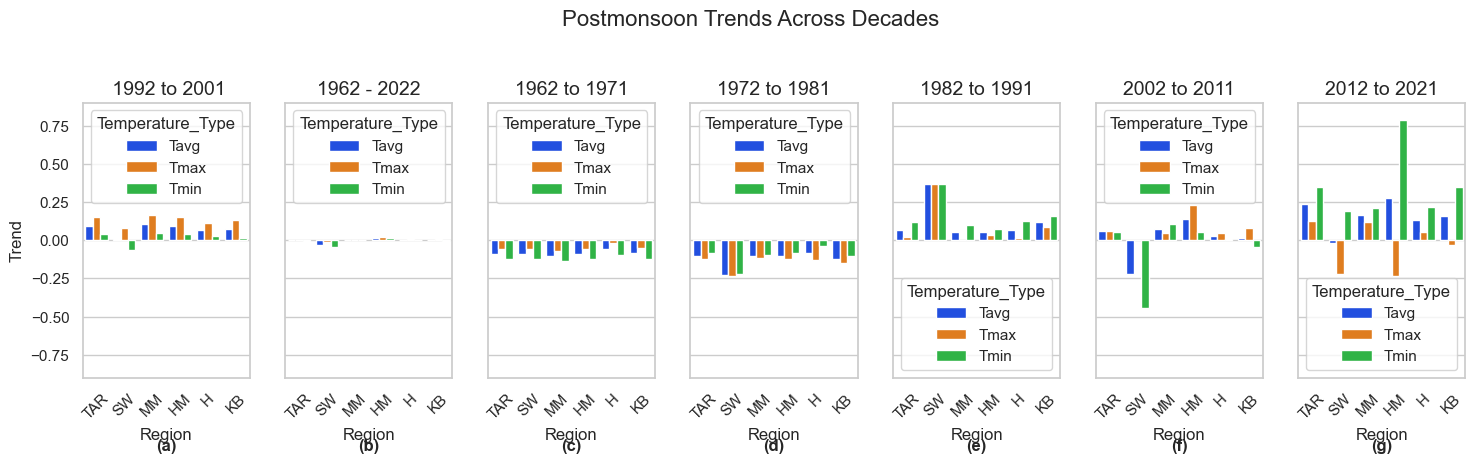

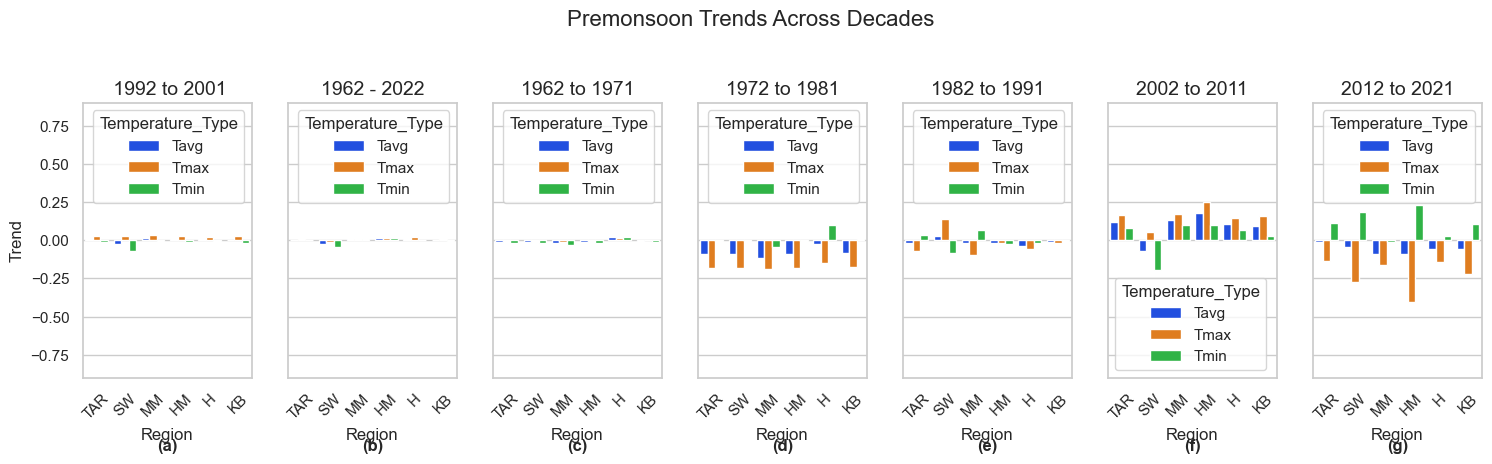

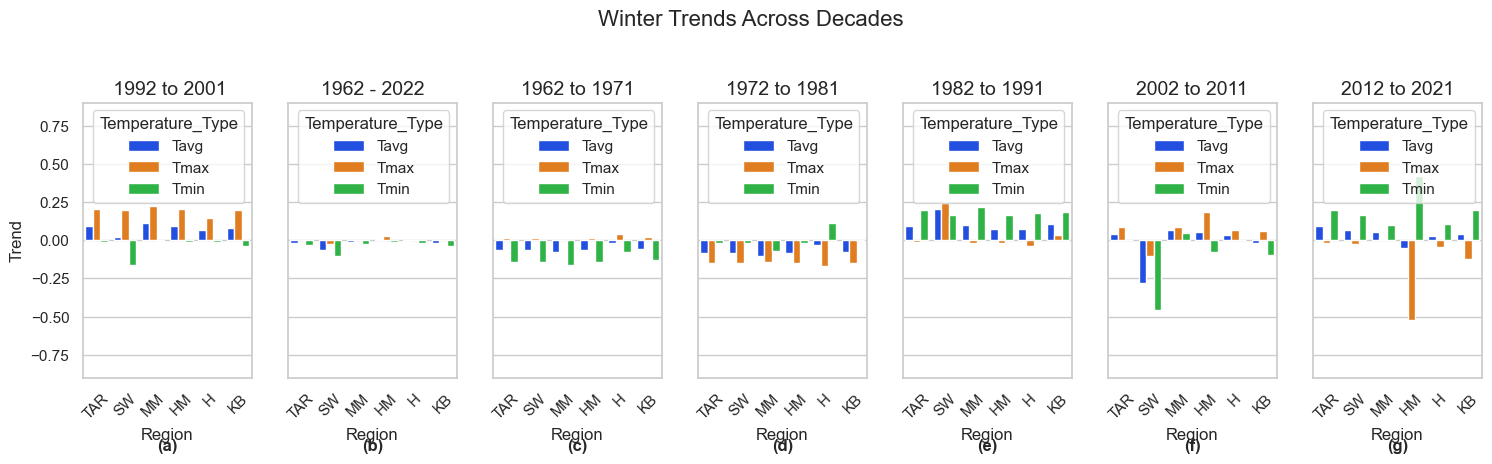

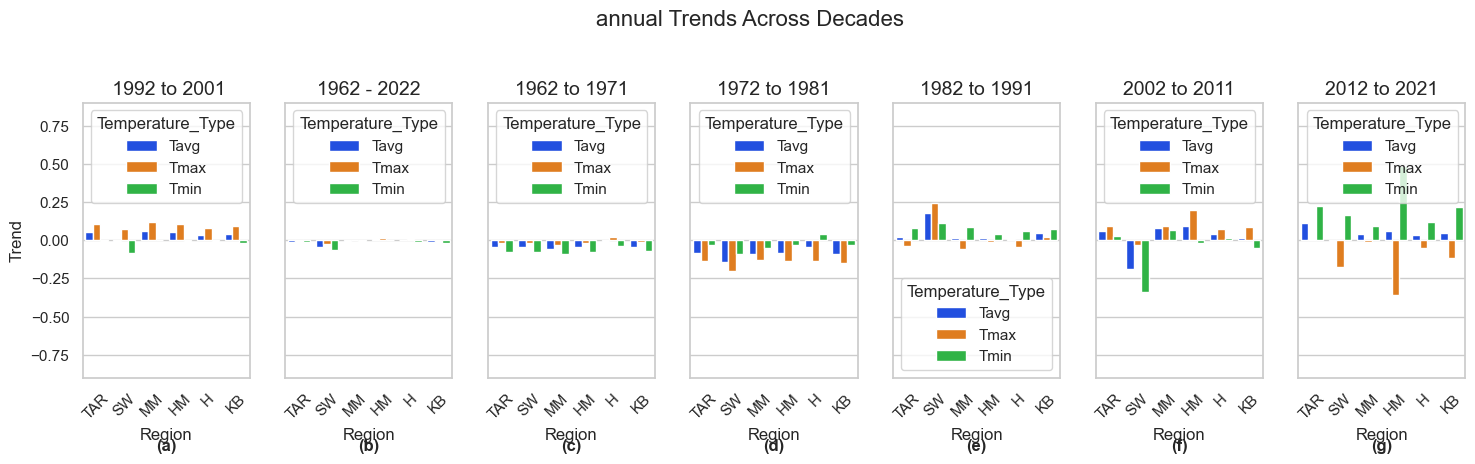

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the order of the 'Region' categories
region_order = ['TAR', 'SW', 'MM', 'HM', 'H', 'KB']  

# Set plot style for publication
sns.set(style="whitegrid")

# Calculate global min and max for y-axis limits
global_min = -0.9
global_max = 0.9

# Get unique seasons and sorted decades
unique_seasons = df_long['Season'].unique()
unique_decades = sorted(df_long['Decade'].unique())  # Sort decades for chronological order

# Create plots for each unique season
for season in unique_seasons:
    # Create a figure for each season with subplots for each decade
    fig, axes = plt.subplots(nrows=1, ncols=len(unique_decades), figsize=(15, 5), sharey=True)
    
    # Create subplots for each decade
    for i, decade in enumerate(unique_decades):
        # Filter data for the current decade and season
        df_filtered = df_long[(df_long['Decade'] == decade) & (df_long['Season'] == season)]
        
        # Create the bar plot for the current season and decade
        sns.barplot(
            data=df_filtered, x='Region', y='Trend', hue='Temperature_Type',
            palette='bright', order=region_order, ax=axes[i]
        )
        
        # Set y-axis limits based on global min and max
        axes[i].set_ylim(global_min, global_max)
        
        # Set the subplot title
        axes[i].set_title(f'{decade}', fontsize=14)
        
        # Set common x-axis label
        #axes[i].set_xlabel('Region', fontsize=12)
        
        # Rotate x-axis labels for better readability
        axes[i].tick_params(axis='x', rotation=45)
        
        # Only add y-axis label for the first subplot
        if i == 0:
            axes[i].set_ylabel('Trend', fontsize=12)

        # Add figure label below each subplot
        axes[i].text(0.5, -0.25, f'({chr(97 + i)})', transform=axes[i].transAxes, fontsize=12, ha='center', va='center', weight='bold')

    # Add a single legend for the entire figure
    handles, labels = axes[0].get_legend_handles_labels()
    #fig.legend(handles, labels, title='Temperature Type', loc='upper right')
    
    # Set the overall figure title for the season
    fig.suptitle(f'{season} Trends Across Decades', fontsize=16)
    
    # Adjust layout to avoid overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to fit the title
    
    # Show the plot
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the order of the 'Region' categories
region_order = ['TAR', 'SW', 'MM', 'HM', 'H', 'KB']  

# Set plot style for publication
sns.set(style="whitegrid")

# Calculate global min and max for y-axis limits
global_min = -0.9
global_max = 0.9

# Get unique seasons and sorted decades
unique_seasons = df_long['Season'].unique()
unique_decades = sorted(df_long['Decade'].unique())  # Sort decades for chronological order

# Create plots for each unique season
for season in unique_seasons:
    # Create a figure for each season with subplots for each decade
    fig, axes = plt.subplots(nrows=1, ncols=len(unique_decades), figsize=(15, 5), sharey=True)
    
    # Create subplots for each decade
    for i, decade in enumerate(unique_decades):
        # Filter data for the current decade and season
        df_filtered = df_long[(df_long['Decade'] == decade) & (df_long['Season'] == season)]
        
        # Create the bar plot for the current season and decade
        sns.barplot(
            data=df_filtered, x='Region', y='Trend', hue='Temperature_Type',
            palette='bright', order=region_order, ax=axes[i], legend=F
        )
        
        # Set y-axis limits based on global min and max
        axes[i].set_ylim(global_min, global_max)
        
        # Set the subplot title
        axes[i].set_title(f'{decade}', fontsize=14)
        
        # Remove the x-axis label (Region)
        axes[i].set_xlabel('')  # Set to empty string
        
        # Rotate x-axis labels for better readability
        axes[i].tick_params(axis='x', rotation=45)
        
        # Only add y-axis label for the first subplot
        if i == 0:
            axes[i].set_ylabel('Trend', fontsize=12)

        # Add figure label inside parentheses
        axes[i].text(0.5, -0.25, f'({chr(97 + i)})', transform=axes[i].transAxes, 
                     fontsize=12, ha='center', va='center', weight='bold')

    # Add a single legend for the entire figure
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title='Temperature Type', loc='upper right')
    


    # Set the overall figure title for the season
    fig.suptitle(f'{season} Trends Across Decades', fontsize=16)
    
    # Adjust layout to avoid overlap
    plt.tight_layout(rect=[0, 0, 1, 0.90])  # Adjust to fit the title and labels
    
    # Show the plot
    plt.show()


# Plot 43

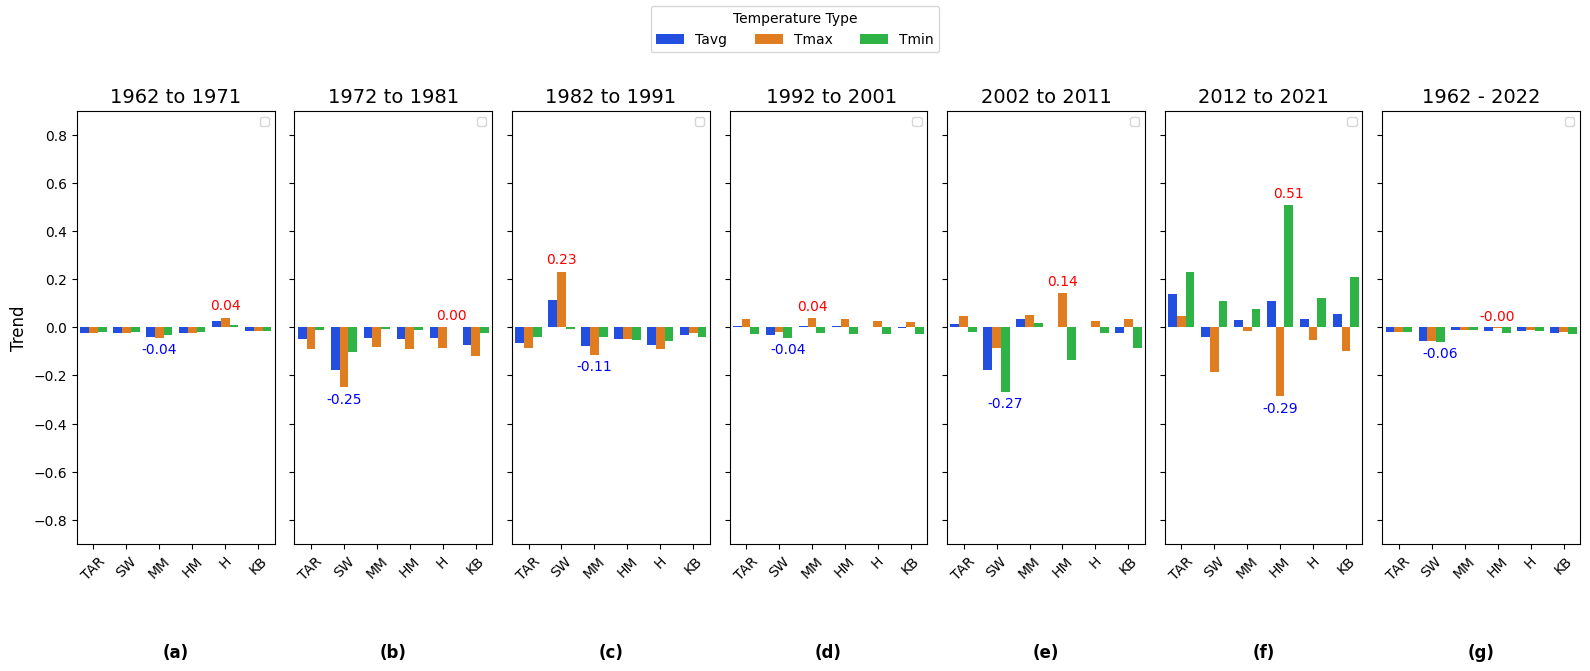

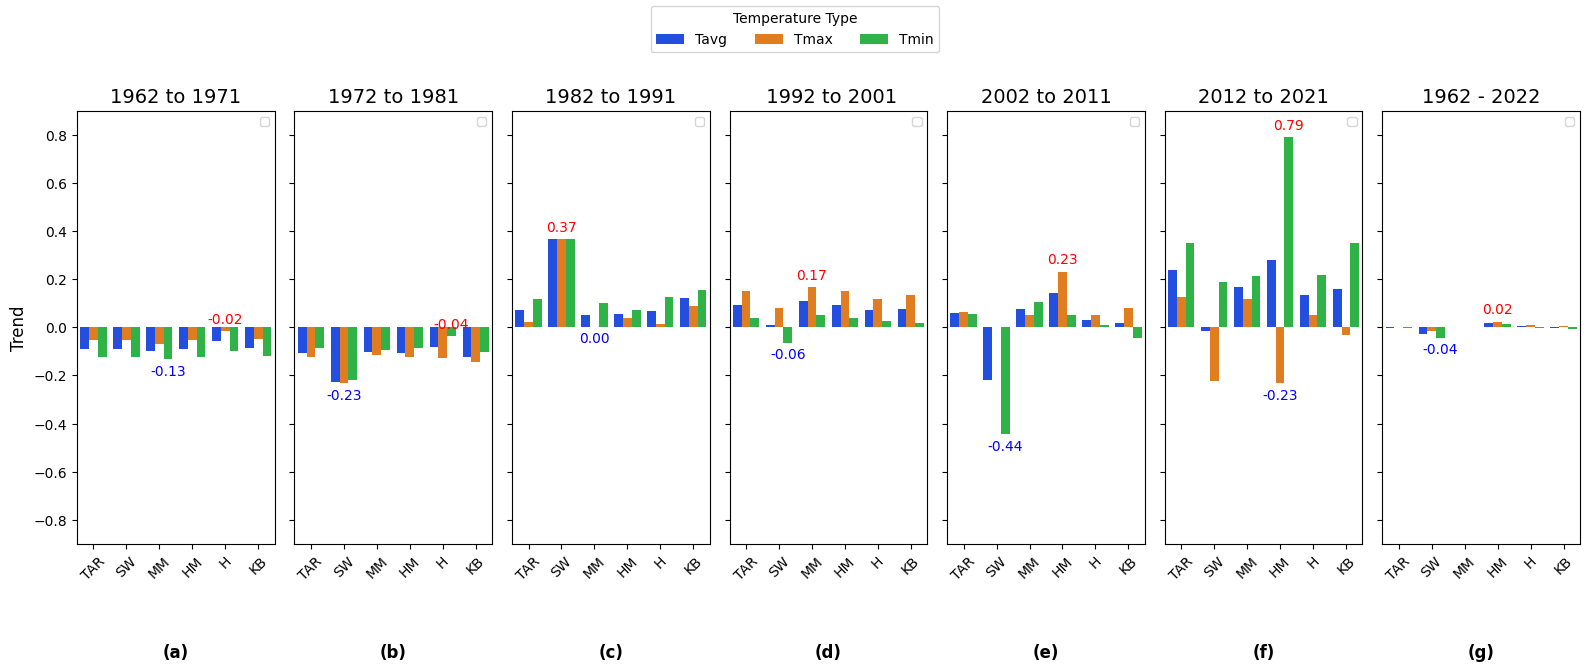

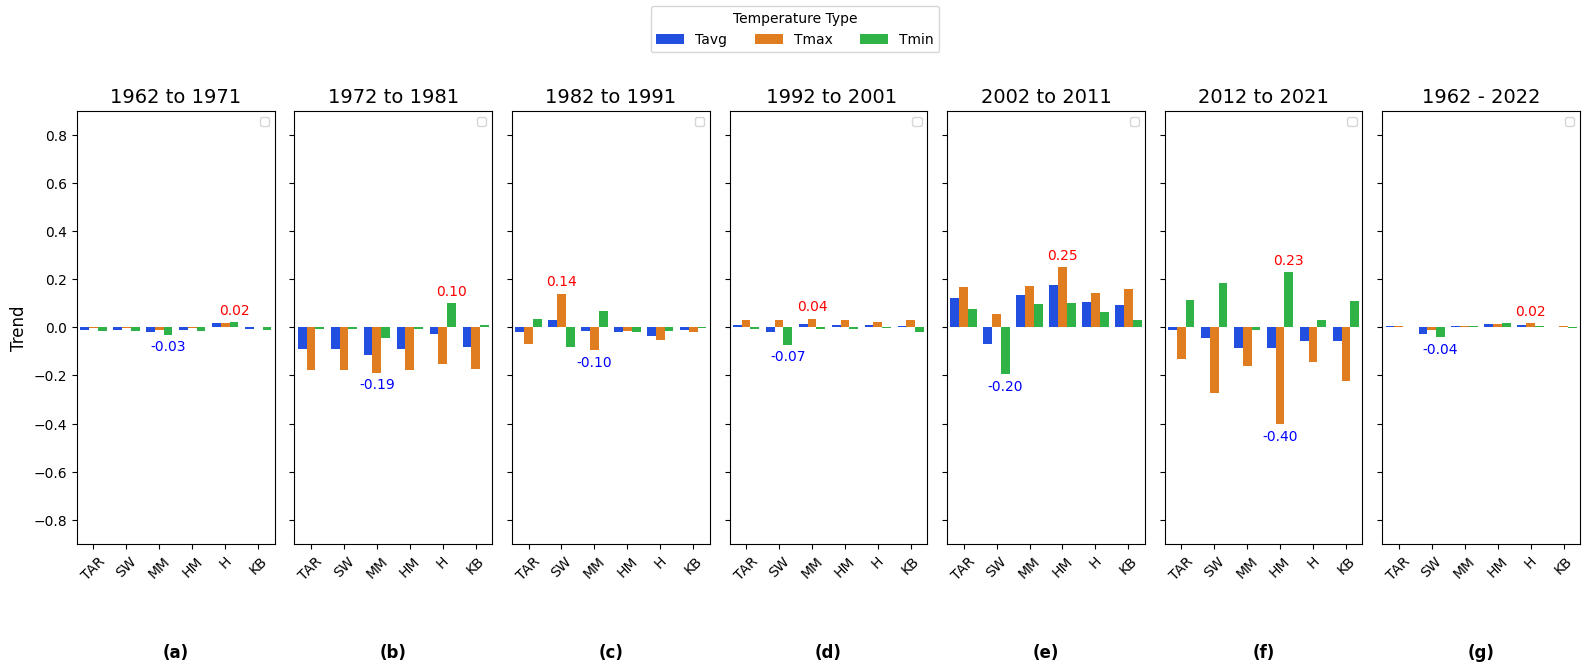

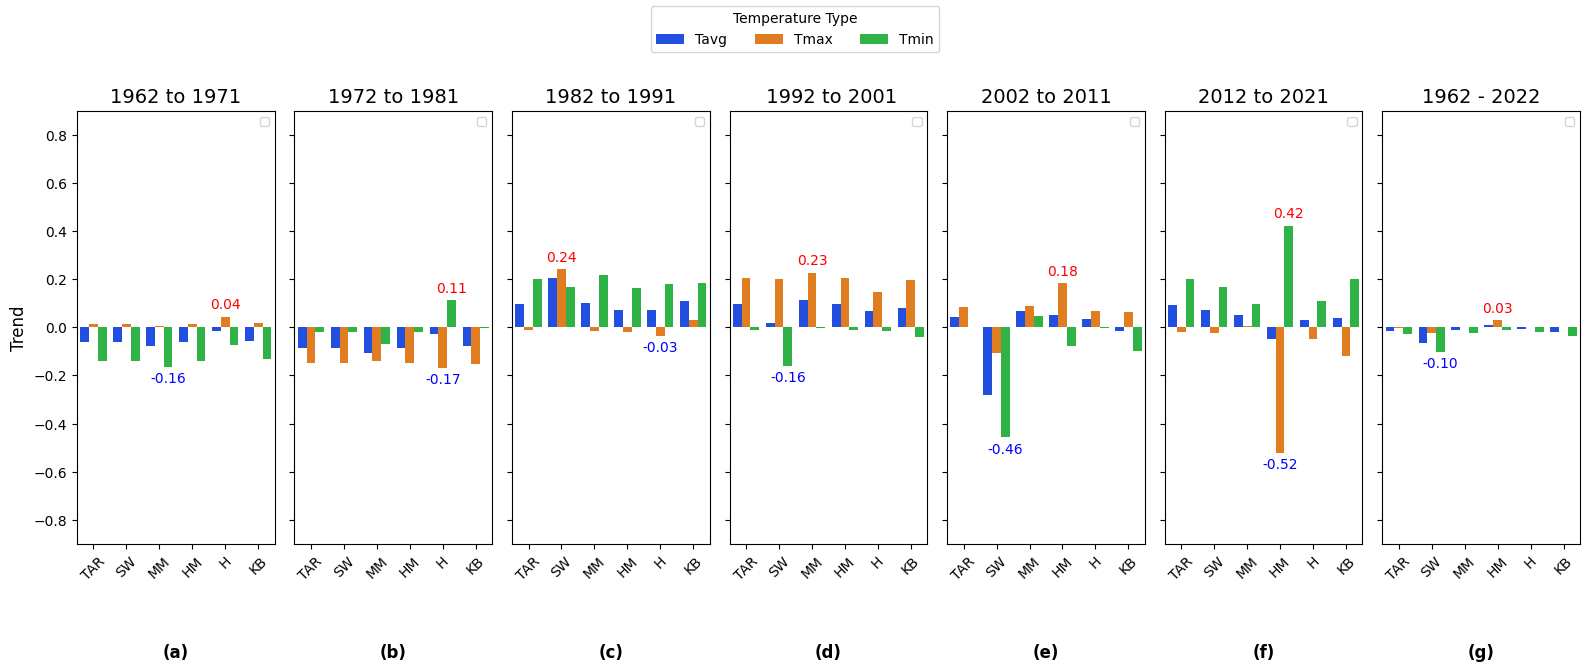

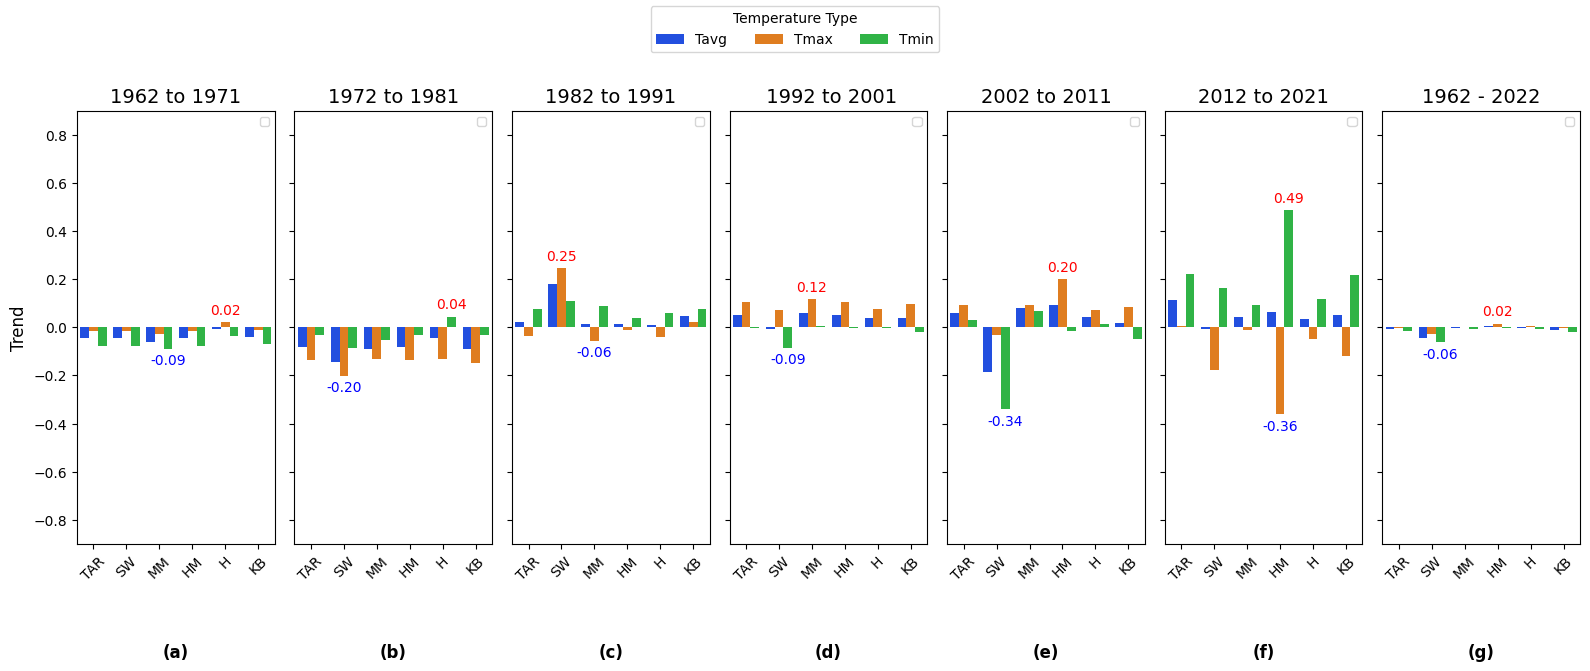

In [7]:

# Define the order of the 'Region' categories
region_order = ['TAR', 'SW', 'MM', 'HM', 'H', 'KB']  
# Calculate global min and max for y-axis limits
global_min = -0.9
global_max = 0.9
# Set plot style for publication
#sns.set(style="whitegrid")
# Get unique seasons and sorted decades
unique_seasons = df_long['Season'].unique()
unique_decades = df_long['Decade'].unique()  # Sort decades for chronological order
# Create plots for each unique season
for season in unique_seasons:
    # Create a figure for each season with subplots for each decade
    fig, axes = plt.subplots(nrows=1, ncols=len(unique_decades), figsize=(16, 7), sharey=True)
    
    # Create subplots for each decade
    for i, decade in enumerate(unique_decades):
        # Filter data for the current decade and season
        df_filtered = df_long[(df_long['Decade'] == decade) & (df_long['Season'] == season)]
        
        # Create the bar plot for the current season and decade
        bar_plot = sns.barplot(
            data=df_filtered, x='Region', y='Trend', hue='Temperature_Type',
            palette='bright', order=region_order, ax=axes[i]
        )
        
        # Set y-axis limits based on global min and max
        axes[i].set_ylim(global_min, global_max)
        
        # Set the subplot title
        axes[i].set_title(f'{decade}', fontsize=14)
        
        # Remove the x-axis label (Region)
        axes[i].set_xlabel('')  # Set to empty string
        
        # Rotate x-axis labels for better readability
        axes[i].tick_params(axis='x', rotation=45)

        axes[i].legend([], title='', loc='upper right', fontsize='small')  # Empty legend

        # Get the maximum and minimum values from the filtered DataFrame
        max_value = df_filtered['Trend'].max()
        min_value = df_filtered['Trend'].min()
        # Define a vertical offset for annotations
        vertical_offset = 0.02  # Adjust this value as needed
        # Annotate the max and min values on the bars
        for p in bar_plot.patches:
            if p.get_height() == max_value:
                axes[i].annotate(f'{max_value:.2f}', 
                                 (p.get_x() + p.get_width() / 2., p.get_height()+ vertical_offset), 
                                 ha='center', va='bottom', fontsize=10, color='red')
            elif p.get_height() == min_value:
                axes[i].annotate(f'{min_value:.2f}', 
                                 (p.get_x() + p.get_width() / 2., p.get_height()+ vertical_offset - 0.04), 
                                 ha='center', va='top', fontsize=10, color='blue')

        

        
        # Only add y-axis label for the first subplot
        if i == 0:
            axes[i].set_ylabel('Trend', fontsize=12)

        # Add figure label inside parentheses
        axes[i].text(0.5, -0.25, f'({chr(97 + i)})', transform=axes[i].transAxes, 
                     fontsize=12, ha='center', va='center', weight='bold')

    # Create a legend based on the first subplot
    handles, labels = axes[0].get_legend_handles_labels()  # Get handles and labels from the first subplot

    '''unique_labels = {
    "Tmin": plt.Line2D([], [], color='blue'),
    "Tmax": plt.Line2D([], [], color='red'),
    "Tavg": plt.Line2D([], [], color='green')}

    # Add a single legend for the entire figure
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, title='Temperature Type', loc='upper right')'''
    


    unique_labels = dict(zip(labels, handles))  # Keep unique labels only
    fig.legend(unique_labels.values(), unique_labels.keys(), title='Temperature Type', loc='upper center', ncol=len(unique_labels))
    
    # Set the overall figure title for the season
    #fig.suptitle(f'{season.title()} Trends Across Decades', fontsize=16)
    # File path to save the plot
    file_name = f"simple_plots_{season}_Trend.png"
    file_path = r'G:\fresh_start\paper\code_paper\plots\decades_plots\plot_seasonal'

    # Ensure the correct separator is added between the path and file name
    full_path = file_path + '\\' + file_name  # Use a backslash for Windows paths or `/` for cross-platform
    # Adjust layout to avoid overlap
    plt.tight_layout(rect=[0, 0, 1, 0.90])  # Adjust to fit the title and labels
    
    # Save the plot
    plt.savefig(full_path, dpi=1500)
        
    
    
    # Show the plot
    plt.show()
